In [2]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

в 9 записи выброс по разметке - нужно обрезать по длинне

In [3]:
PATH = "/home/gromov_n/MASS/ss2/"

shifts = [[57, 57],
 [10, 10],
 [170, 170],
 [200, None],
 [220, 220],
 [20, 20],
 [245, 245],
 [230, None],
 [195, 195],
 [192, 192],
 [14, 14],
 [195, 195],
 [240, 240],
 [155, 155],
 [178, None],
 [95, None],
 [230, 230],
 [230, 230],
 [230, 230]]

In [3]:
freqs = [32.002048131080386, 60.00384024577573, 60.00384024577573, 60.00384024577573, 60.00384024577573, 60.00384024577573, 59.5038082437276, 32.002048131080386, 32.002048131080386, 60.00384024577573, 60.00384024577573, 32.002048131080386, 60.00384024577573, 60.00384024577573, 58.50374423963133, 60.00384024577573, 32.002048131080386, 32.002048131080386, 60.00384024577573]

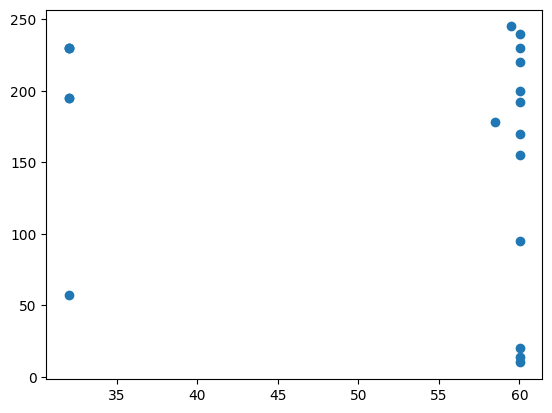

In [5]:
plt.scatter(freqs, [val[0] for val in shifts])

In [9]:
def Plotting(labels, data):
    raw_data = data.get_data()
    fig = plt.figure(figsize=(16, 9))
    ax_1 = fig.add_subplot(2, 1, 1)
    ax_2 = fig.add_subplot(2, 1, 2)
    
    ind = labels.argmax()
    ax_1.plot(raw_data[3, ind - 100: ind + 500])
    ax_1.plot(labels[ind - 100: ind + 500] * 3e-5)

    ind = len(raw_data[3]) - np.flip(labels).argmax()
    ax_2.plot(raw_data[3, ind - 500: ind + 100])
    ax_2.plot(labels[ind - 500: ind + 100] * 3e-5)
    plt.show()
    

In [7]:
def Labeling(time, events, shift):
    labels = np.zeros_like(time)
    for event in events:
        start = np.array(time < event["onset"]).argmin() - 1
        fin = np.array(time < event["onset"] + event["duration"]).argmin() - 1
        labels[start - shift:fin - shift] =  1
    return labels

In [300]:
def LabelingAllData(shifts):
    data_filenames = []
    freqs = []
    for file in os.listdir(PATH):
        if "PSG" in file:
            data_filenames.append(file)
    for file in data_filenames:
        i = int(file[8:10]) - 1
        print(i, file)
        annot_filenameE1 = file[:10] + " Spindles_E1.edf"
        annot_filenameE2 = file[:10] + " Spindles_E2.edf"

        data = mne.io.read_raw_edf(PATH + file)

        labels1 = 0
        labels2 = 0
        
        if annot_filenameE1 in os.listdir(PATH):
            annot_data =  mne.io.read_raw_edf(PATH + annot_filenameE1)
            labels1 = Labeling(data.times, annot_data.annotations, shifts[i][0])
            Plotting(labels1, data)
            freqs.append(annot_data.info["sfreq"])
            annot_data.close()
        
        if annot_filenameE2 in os.listdir(PATH):
            annot_data =  mne.io.read_raw_edf(PATH + annot_filenameE2)
            labels2 = Labeling(data.times, annot_data.annotations, shifts[i][1])
            Plotting(labels2, data)
            annot_data.close()

        labels = np.clip(labels1 + labels2, a_min=0, a_max=1)
        np.save("data/" + file + "labels", labels)
        data.close()
    print(freqs)       
        

3 01-02-0004 PSG.edf
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0004 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0004 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


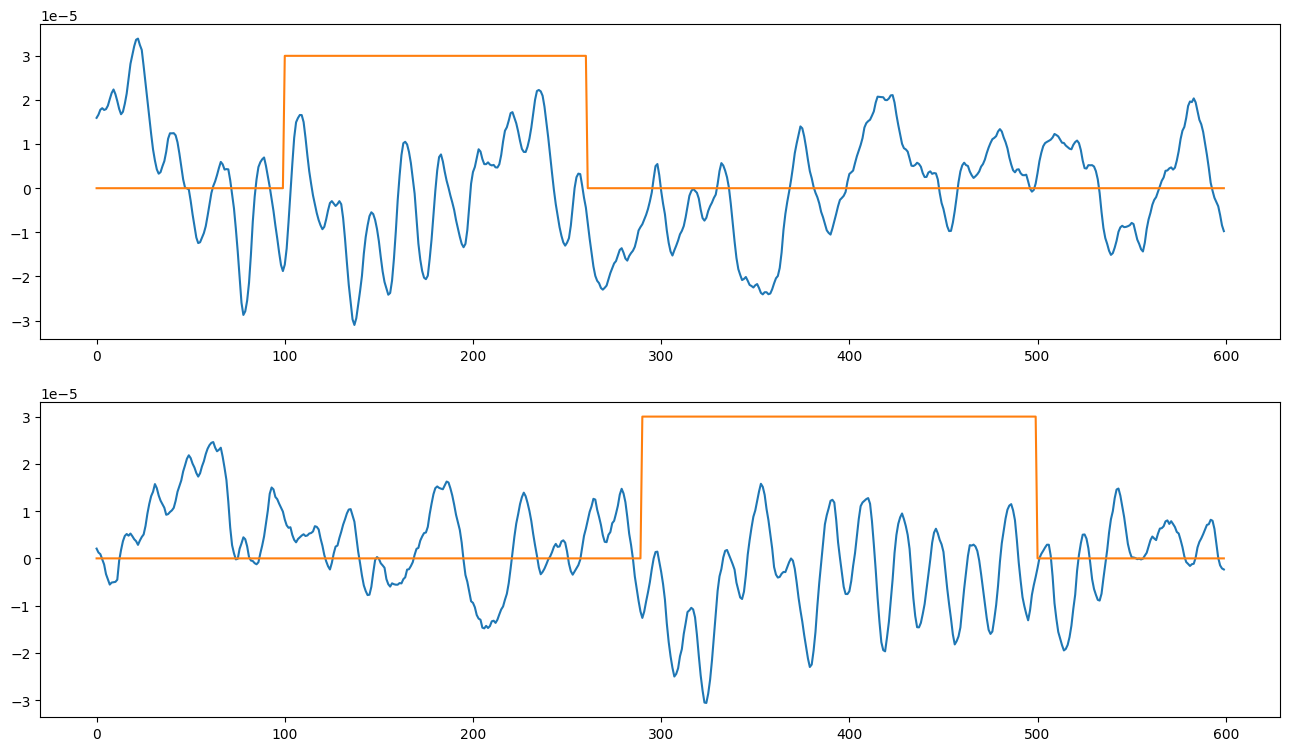

9 01-02-0010 PSG.edf
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0010 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0010 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


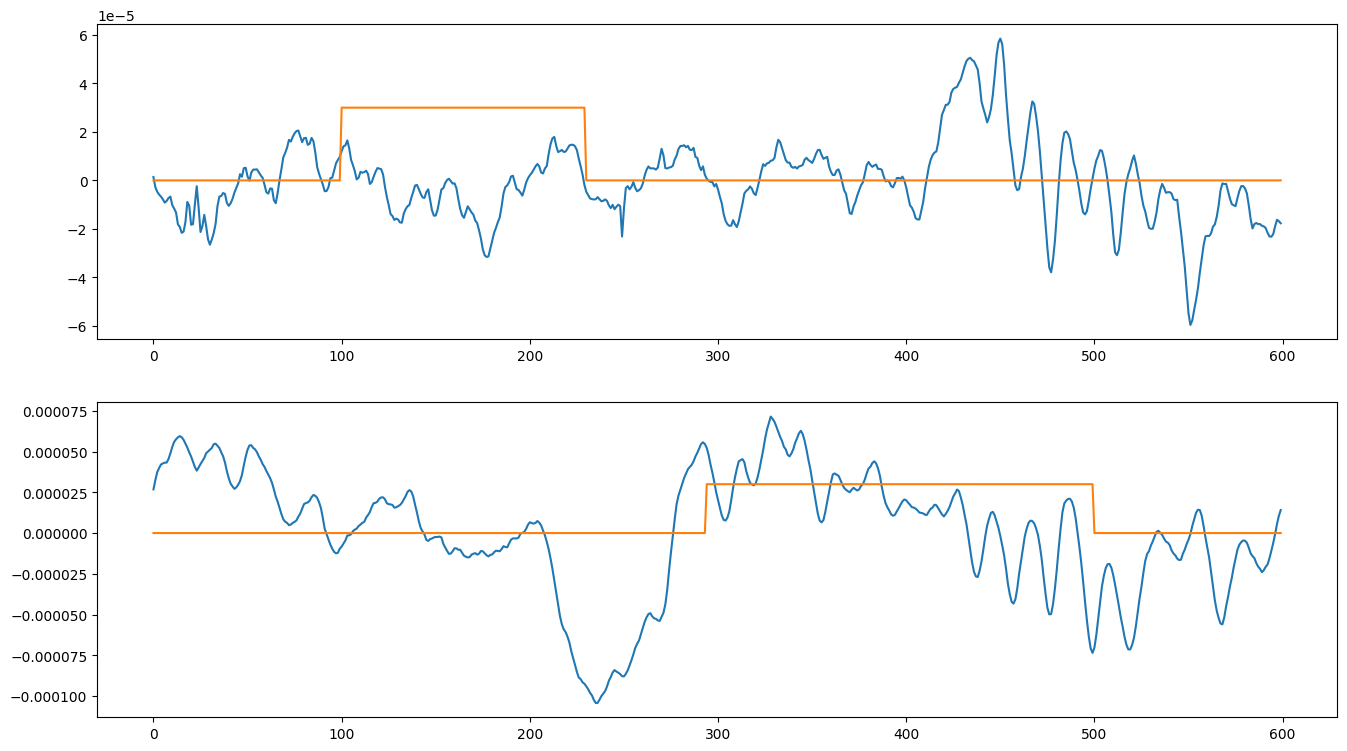

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0010 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


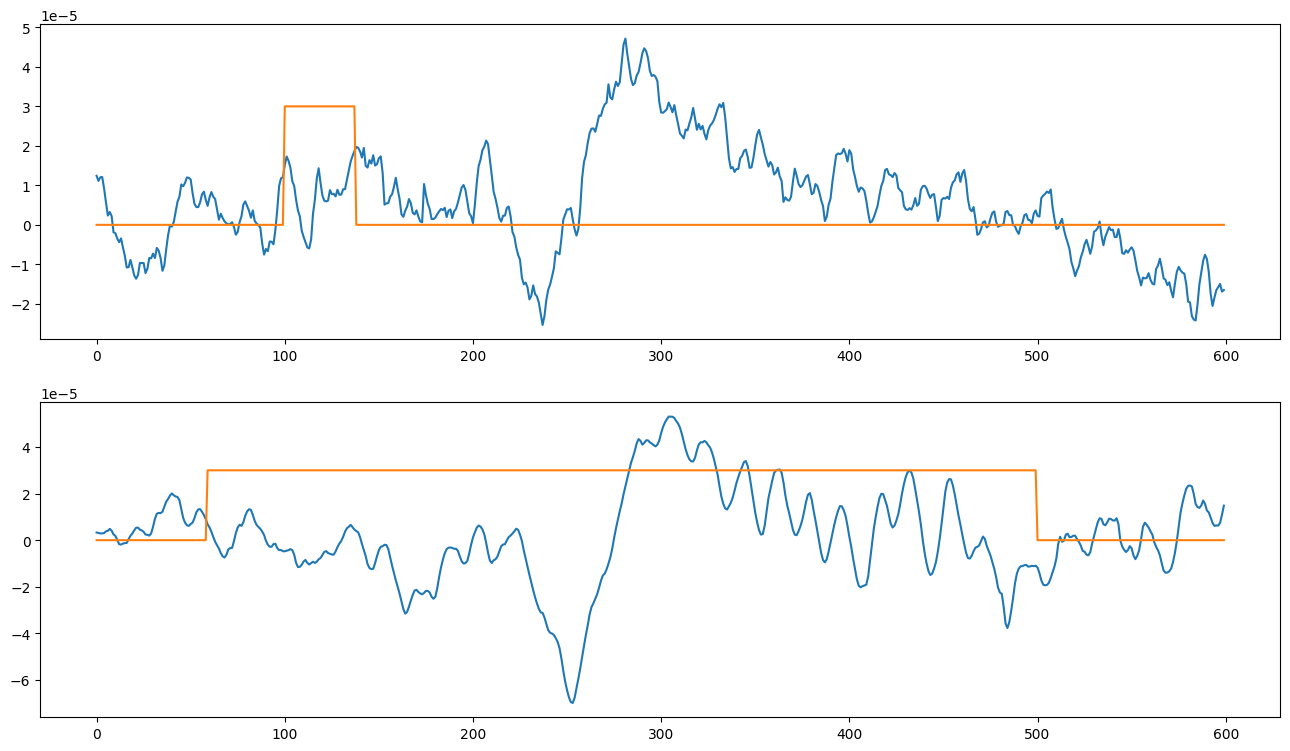

12 01-02-0013 PSG.edf
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0013 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0013 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


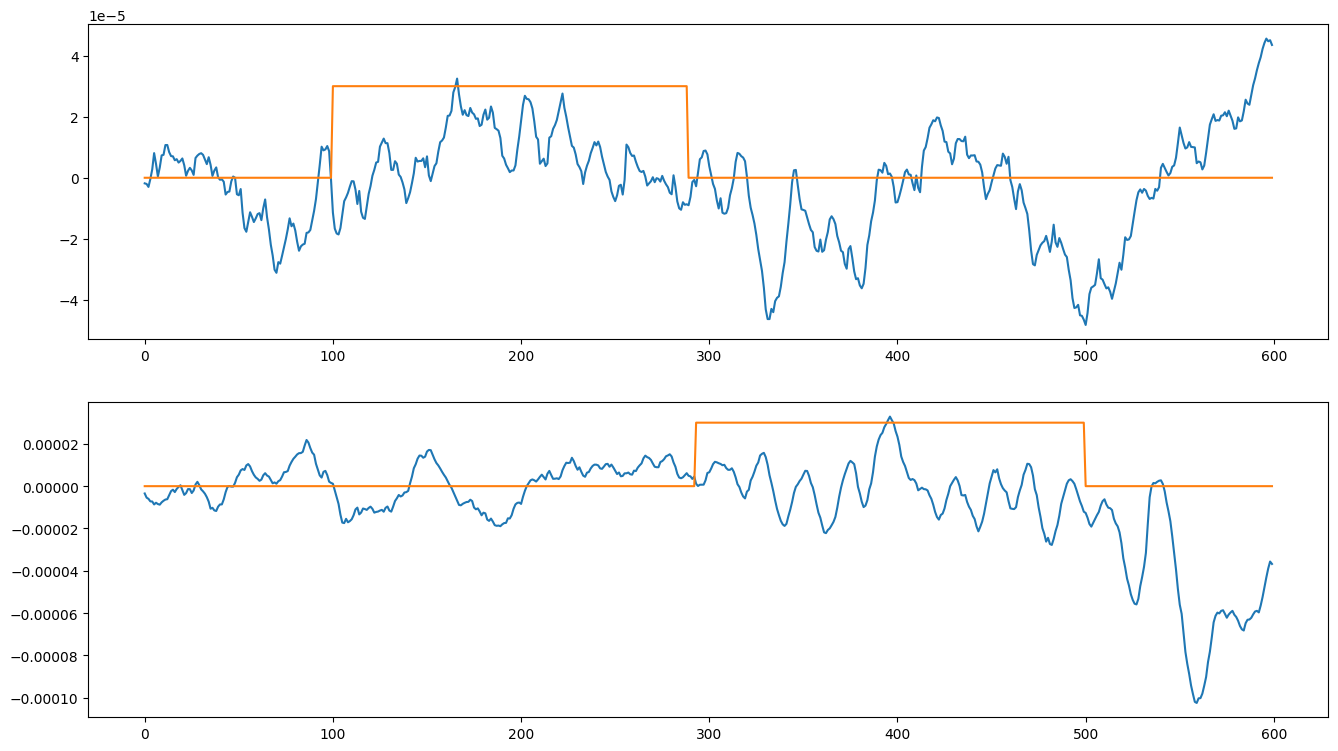

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0013 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


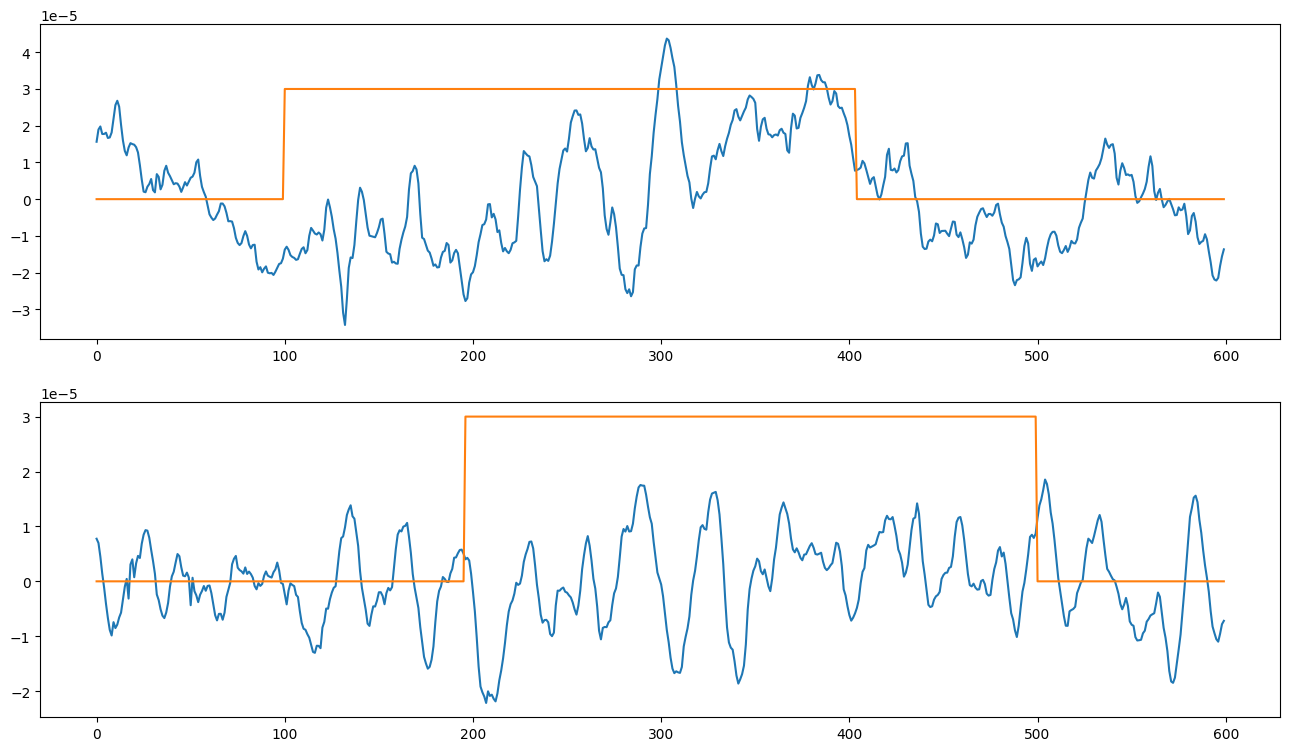

8 01-02-0009 PSG.edf
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0009 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0009 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


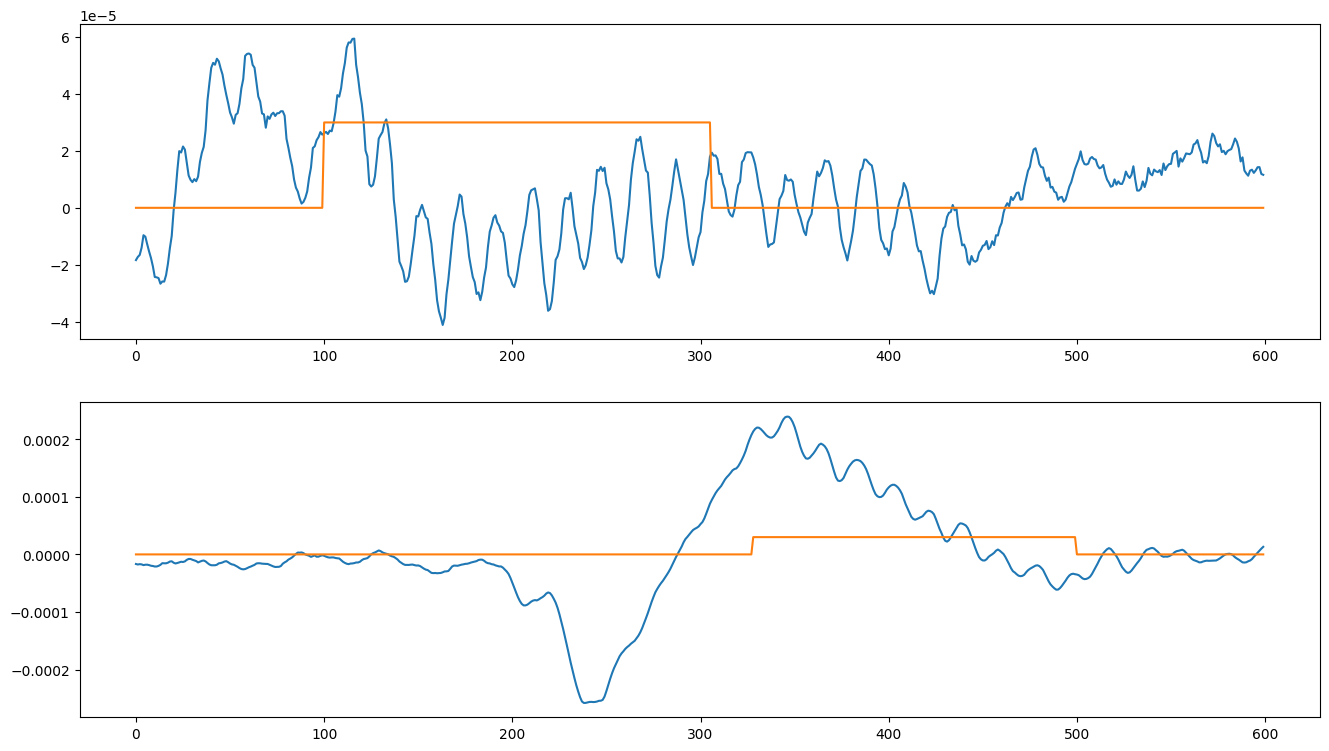

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0009 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


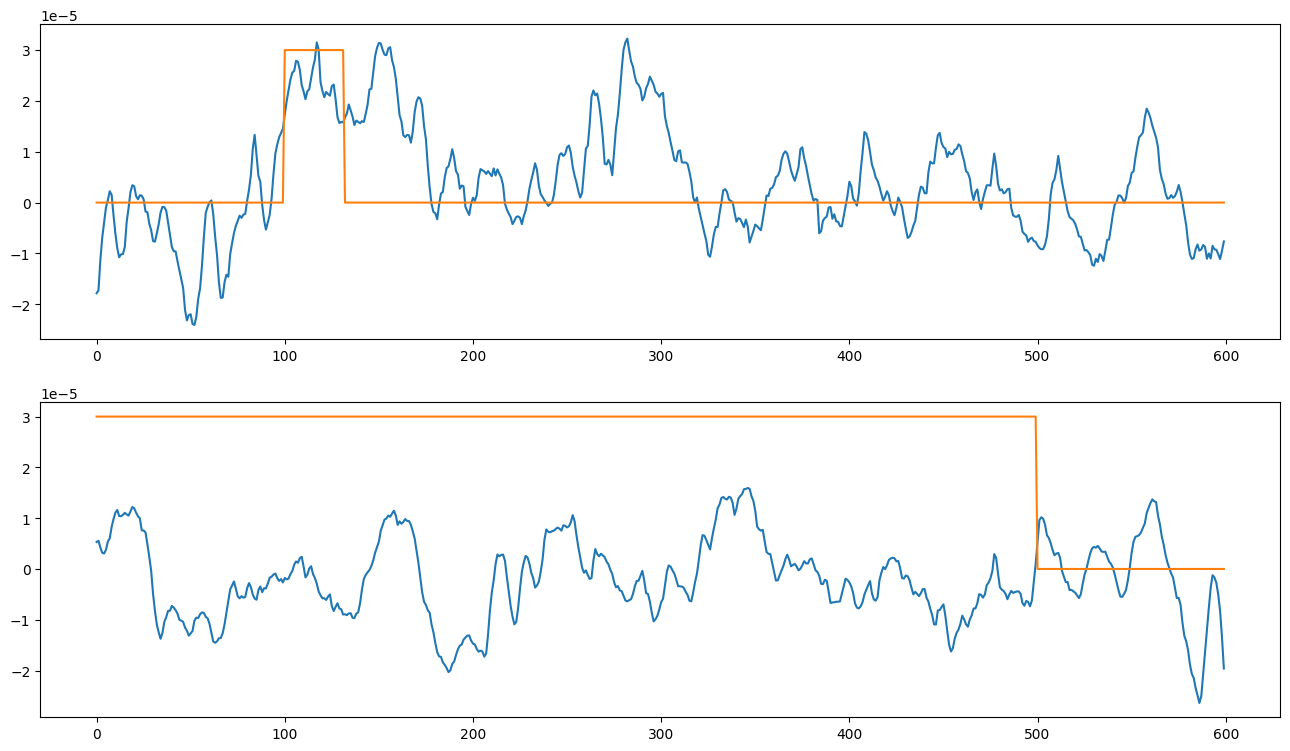

11 01-02-0012 PSG.edf
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0012 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0012 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


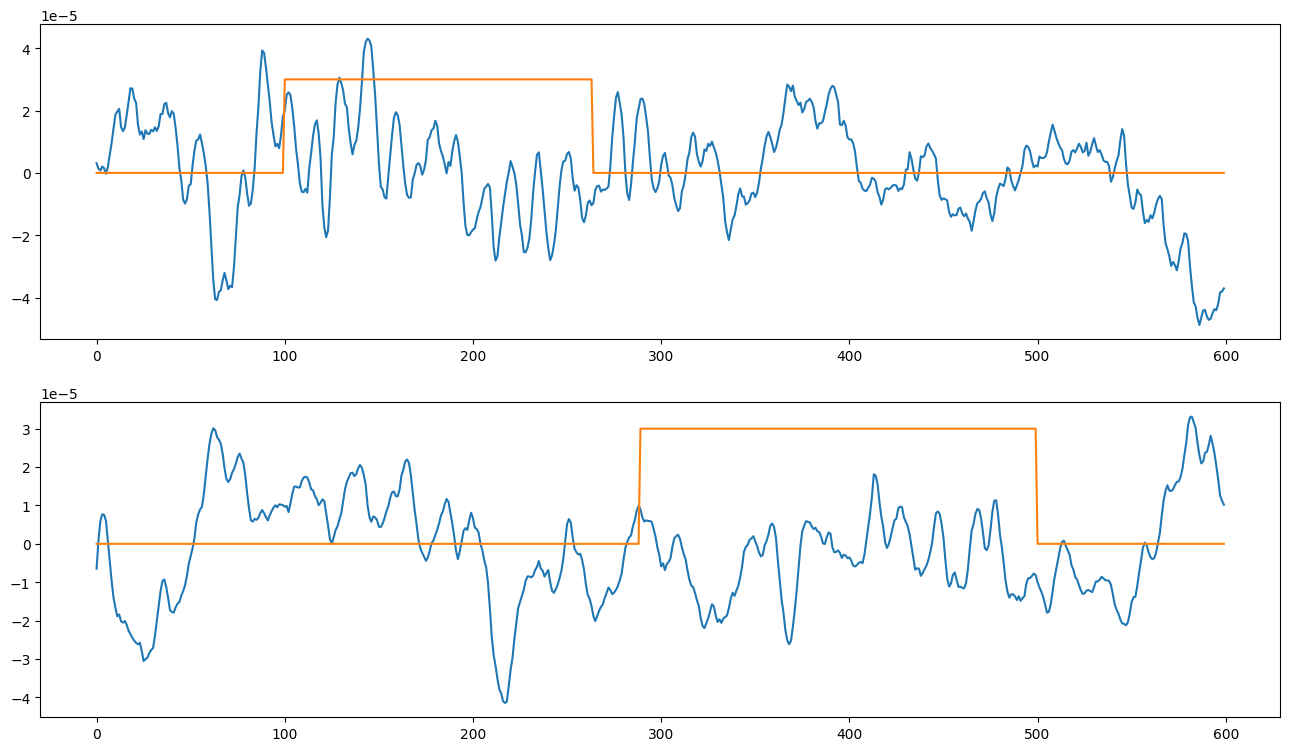

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0012 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


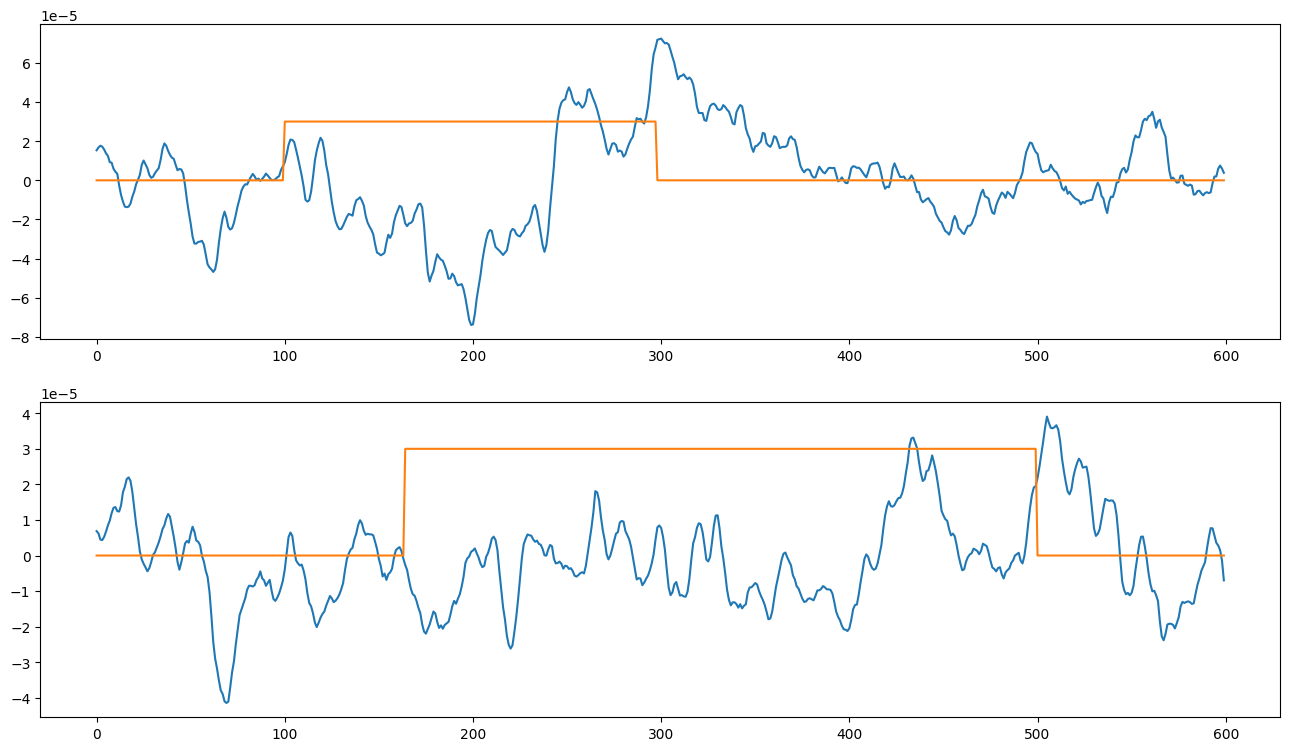

7 01-02-0008 PSG.edf
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0008 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0008 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


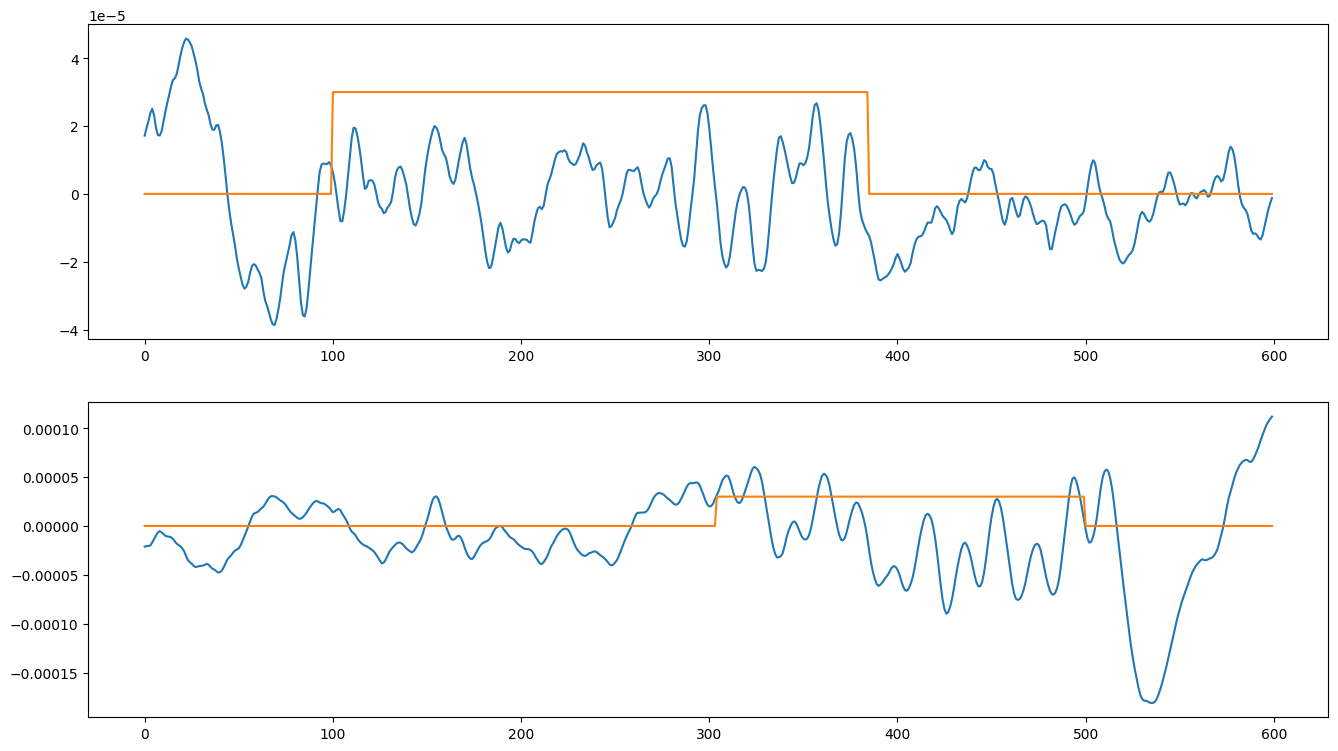

1 01-02-0002 PSG.edf
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0002 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0002 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


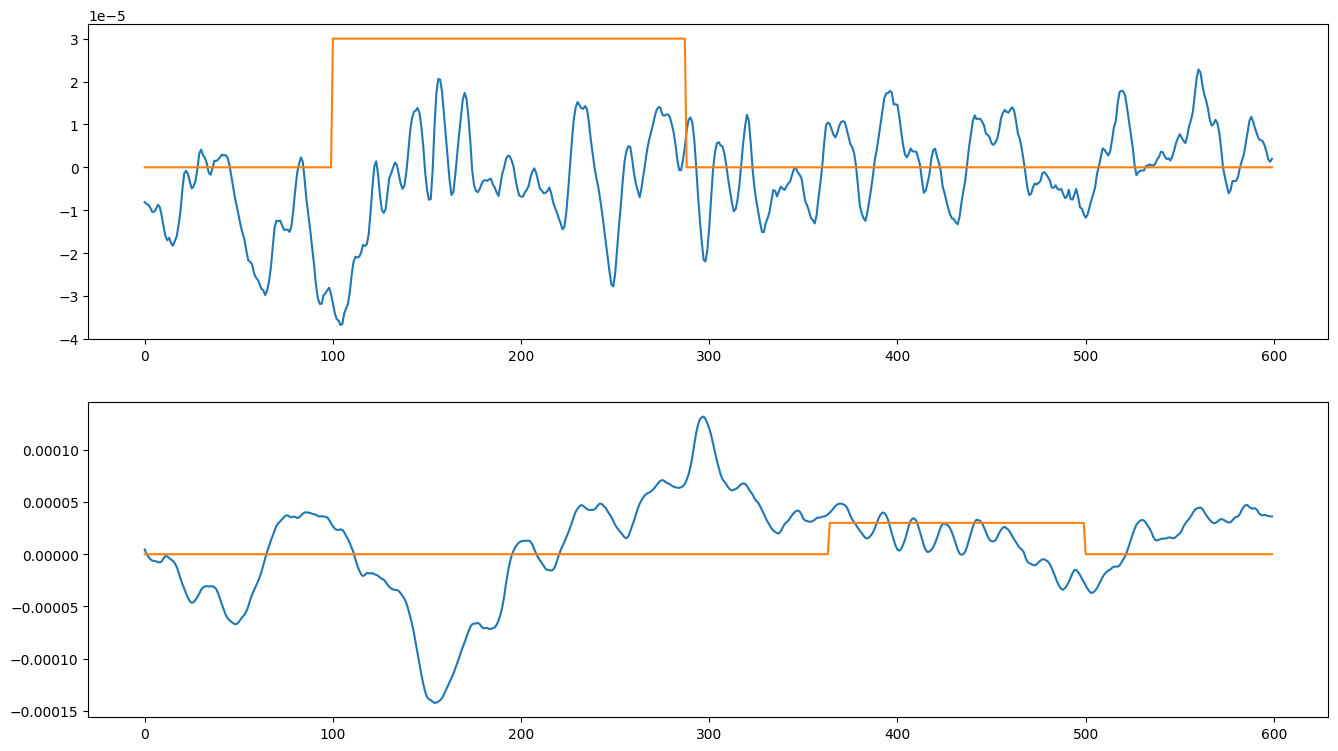

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0002 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


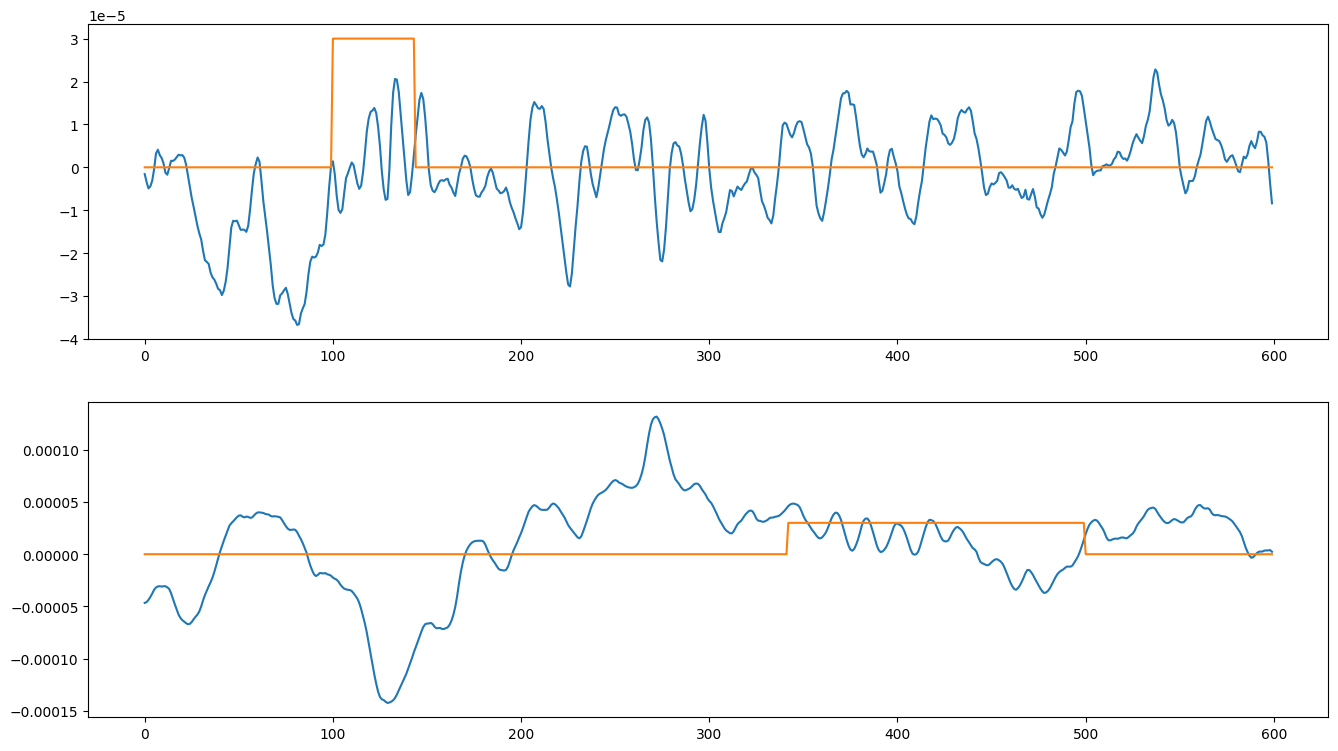

5 01-02-0006 PSG.edf
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0006 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0006 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


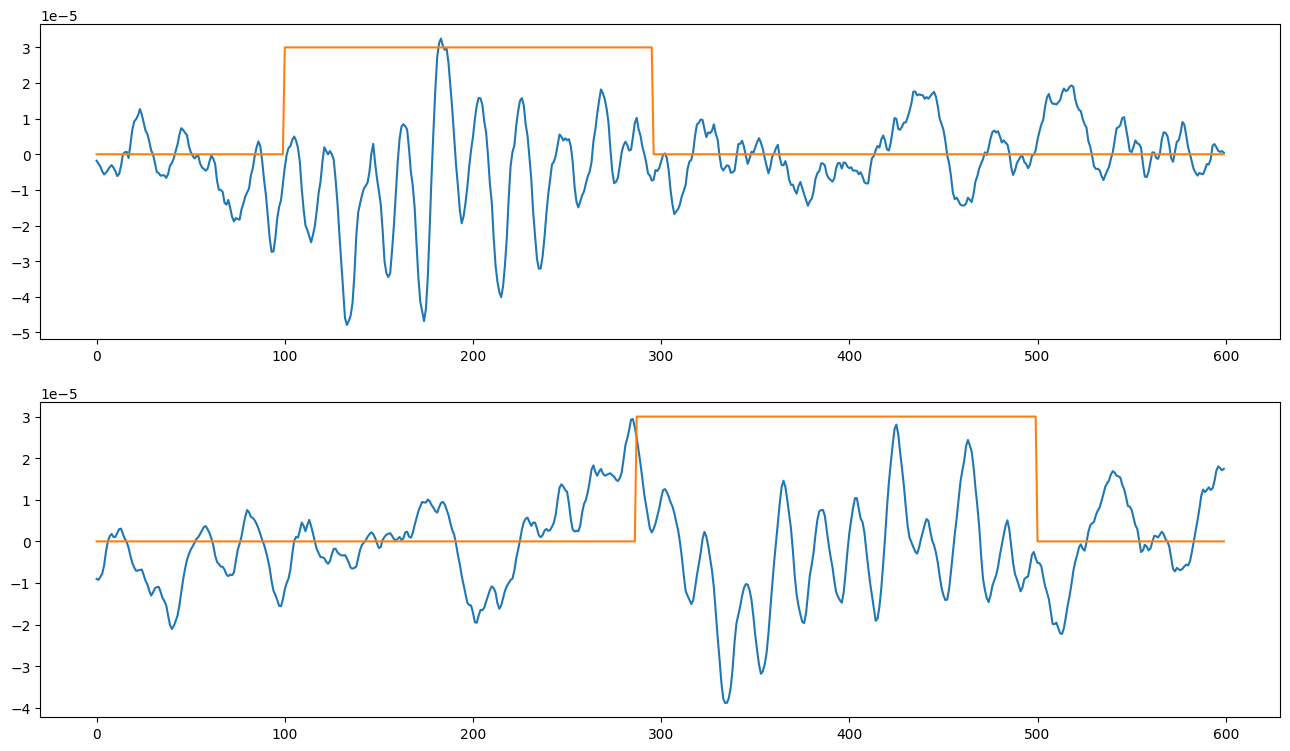

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0006 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


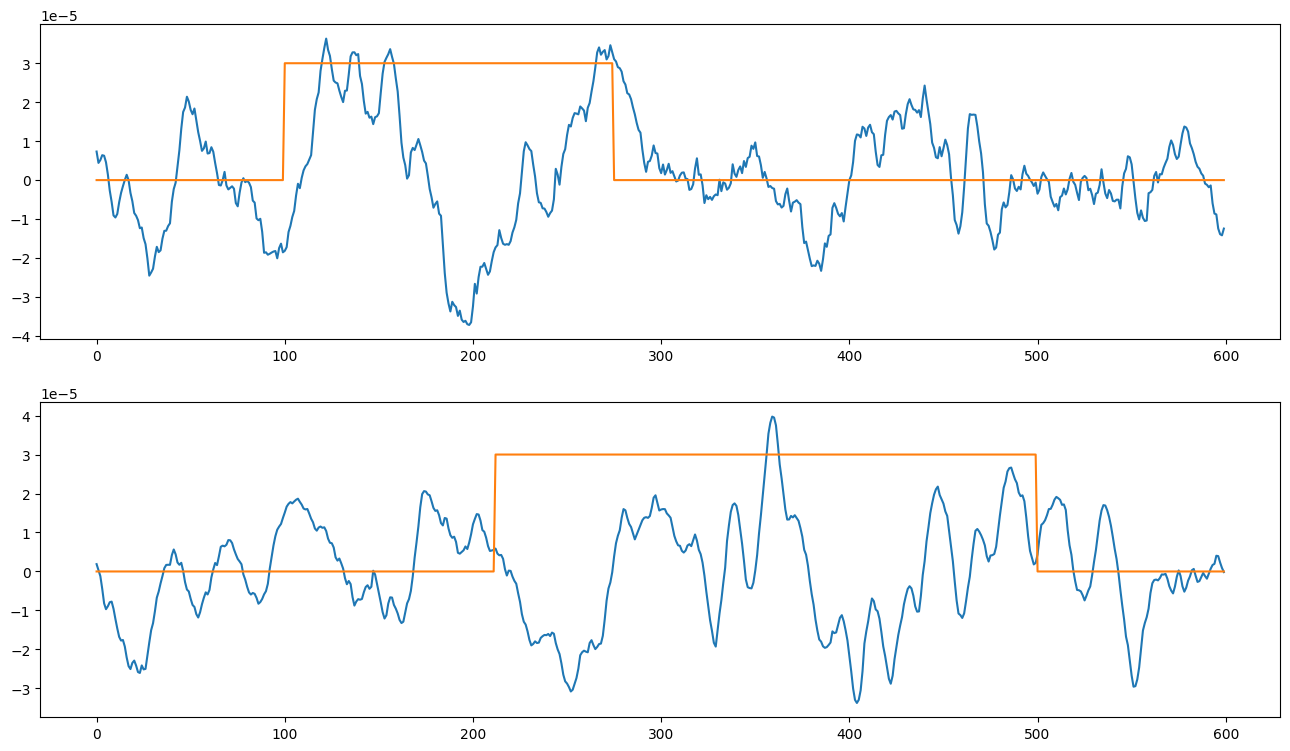

18 01-02-0019 PSG.edf
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0019 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0019 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


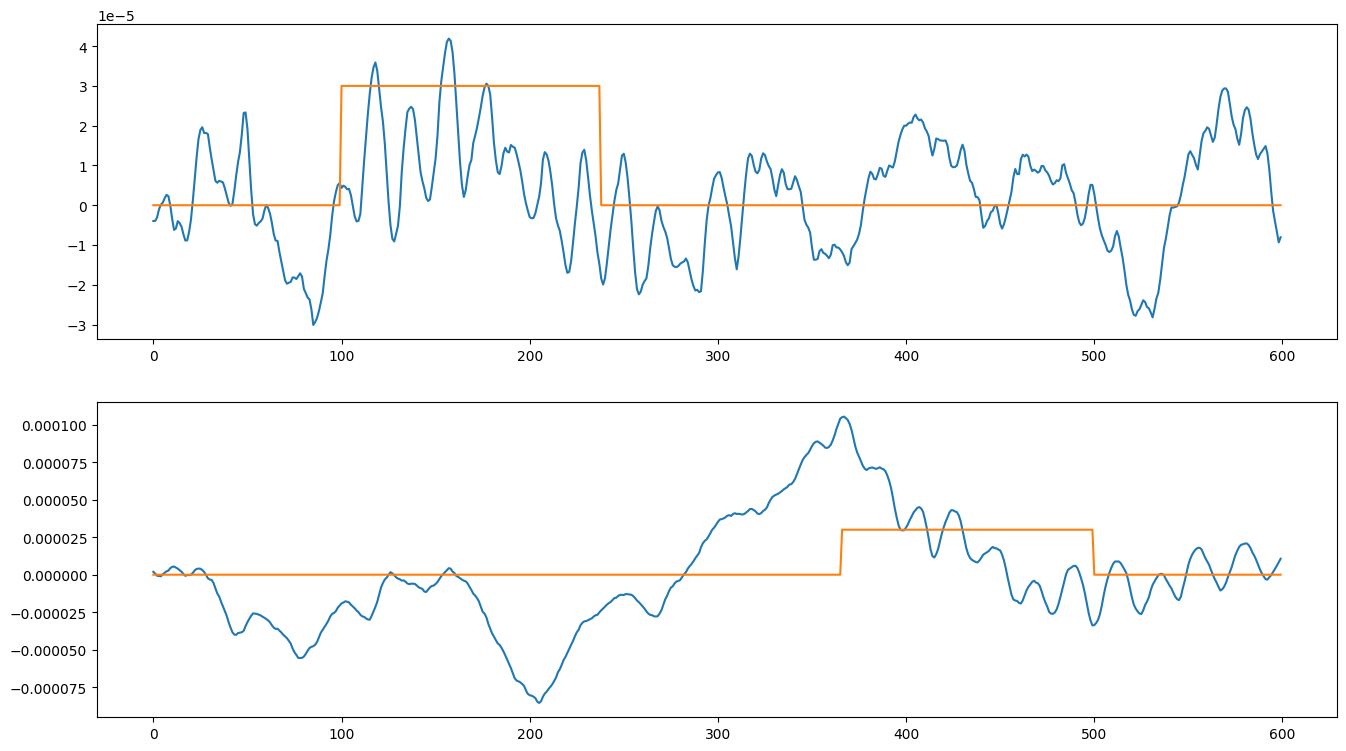

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0019 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


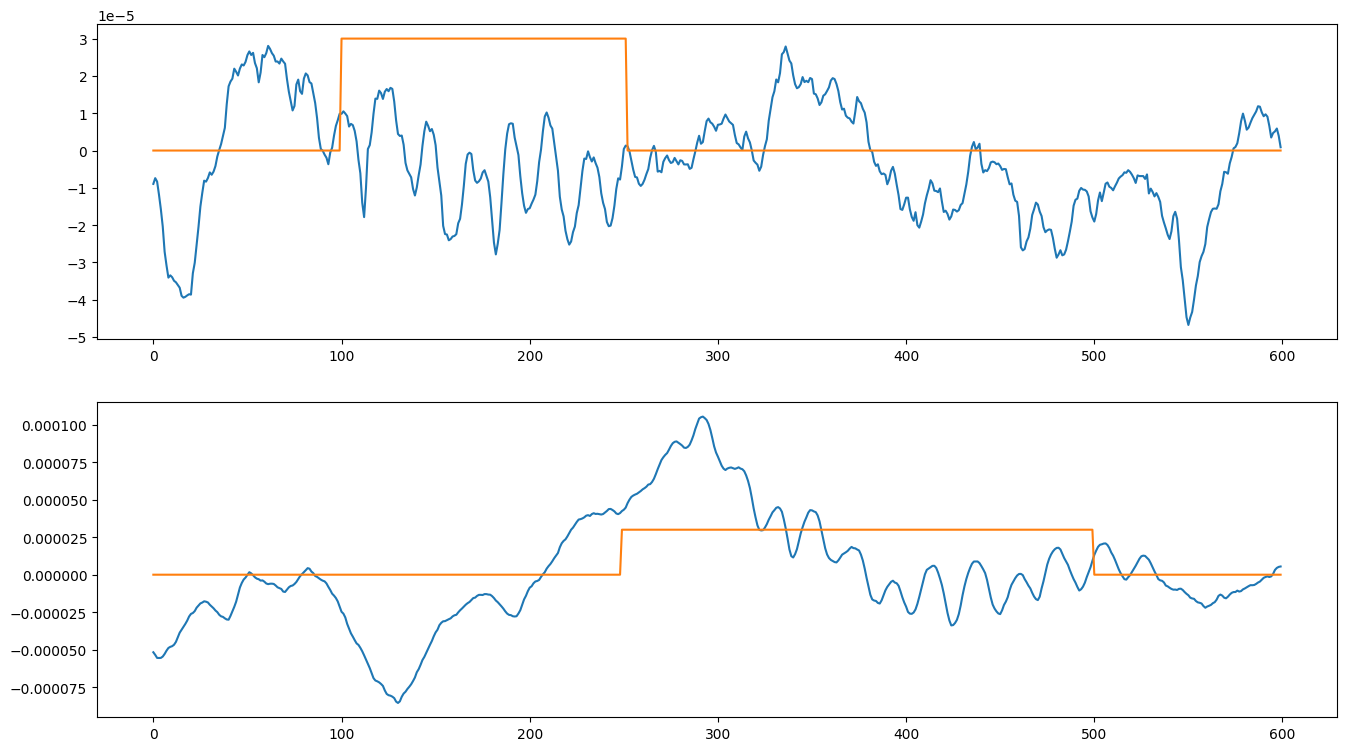

17 01-02-0018 PSG.edf
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0018 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0018 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


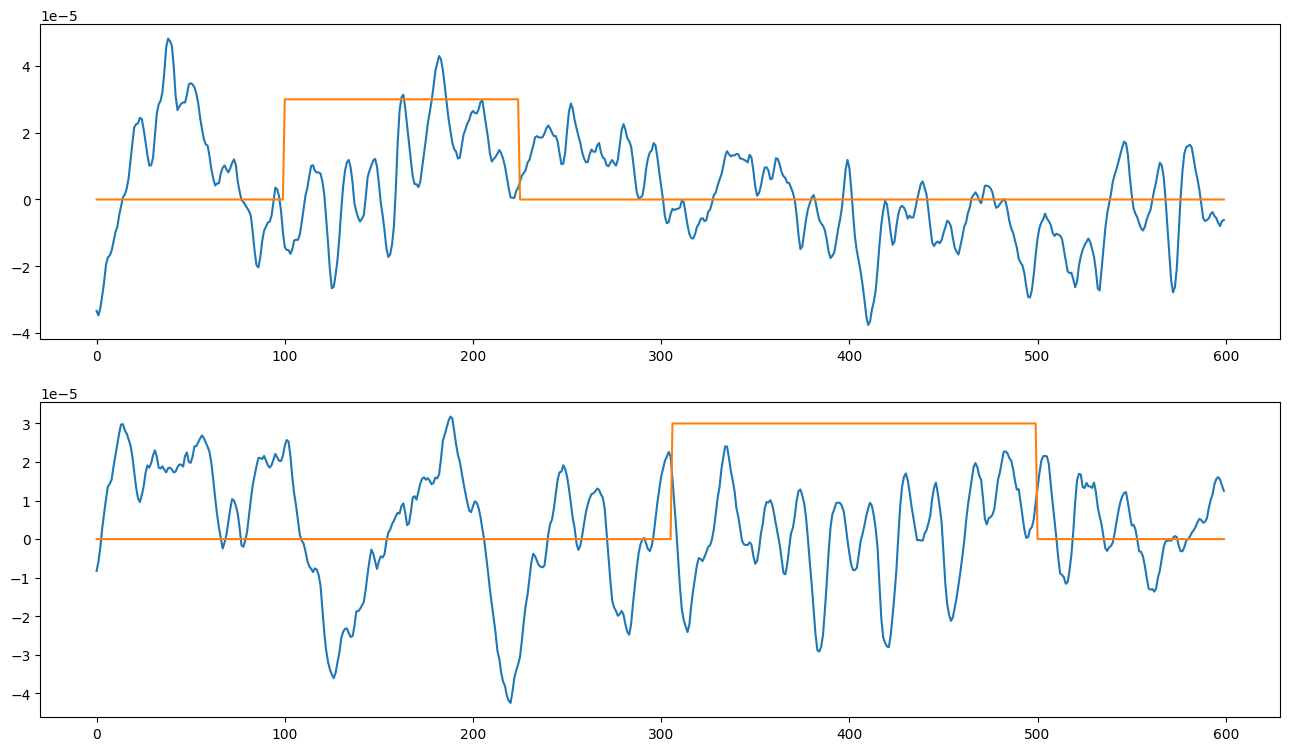

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0018 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


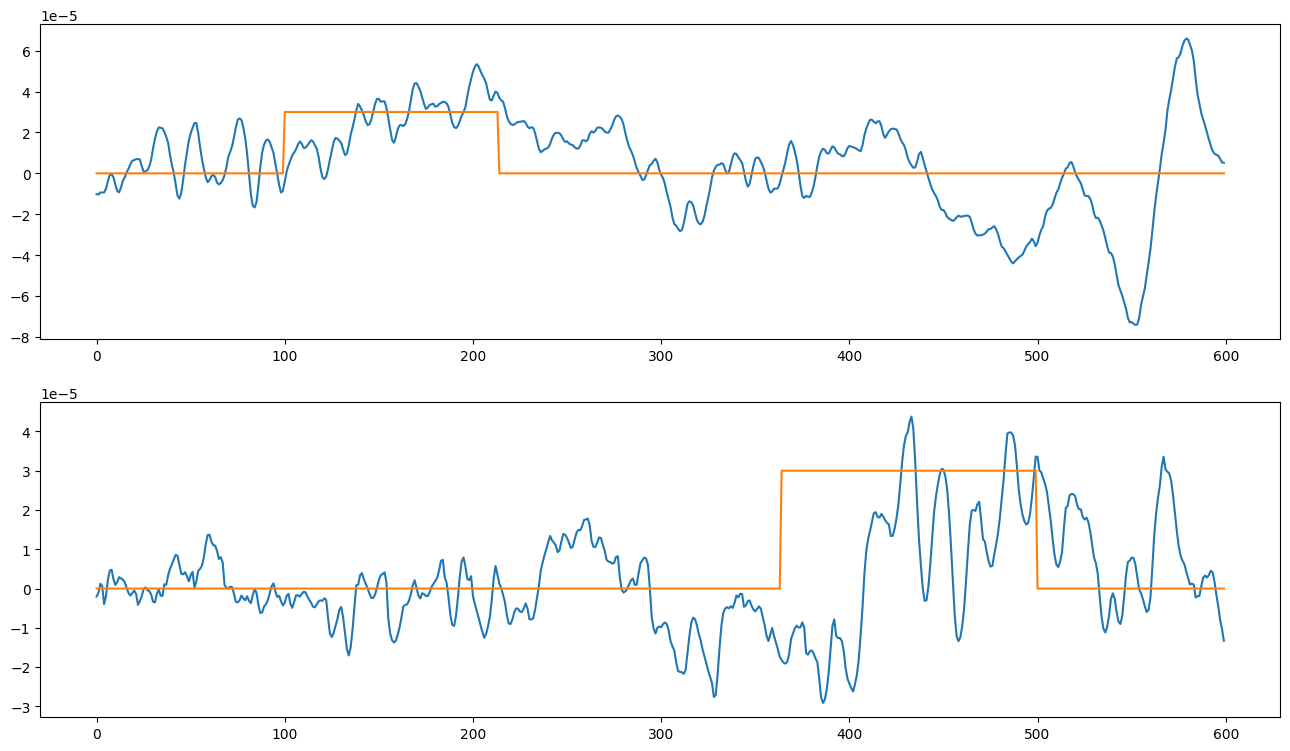

16 01-02-0017 PSG.edf
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0017 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0017 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


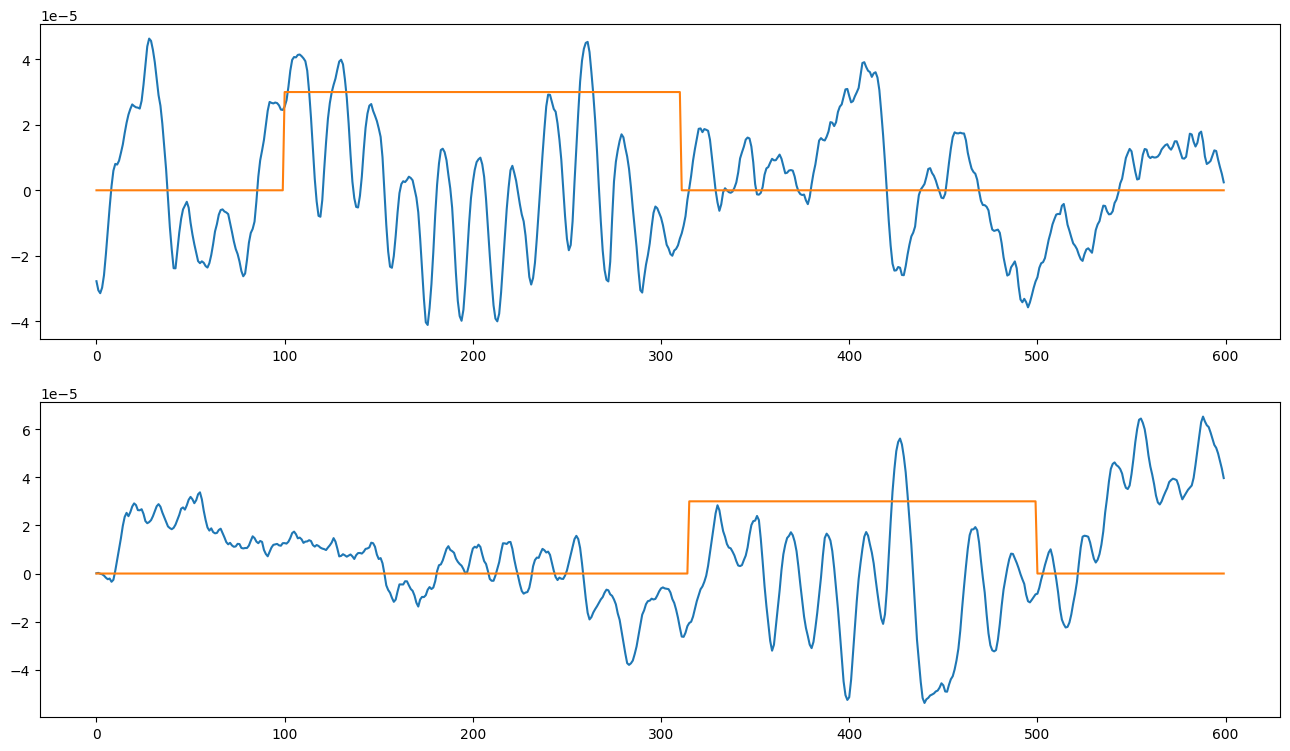

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0017 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


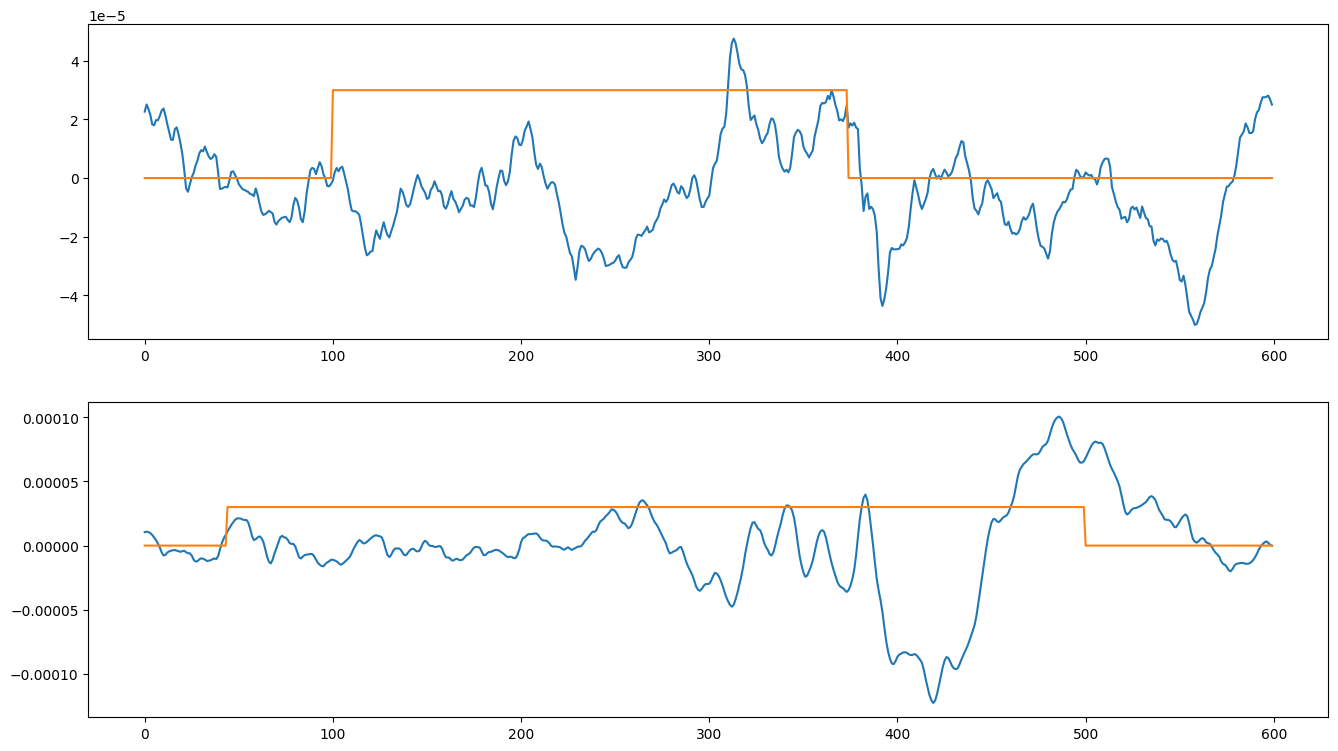

14 01-02-0015 PSG.edf
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0015 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0015 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


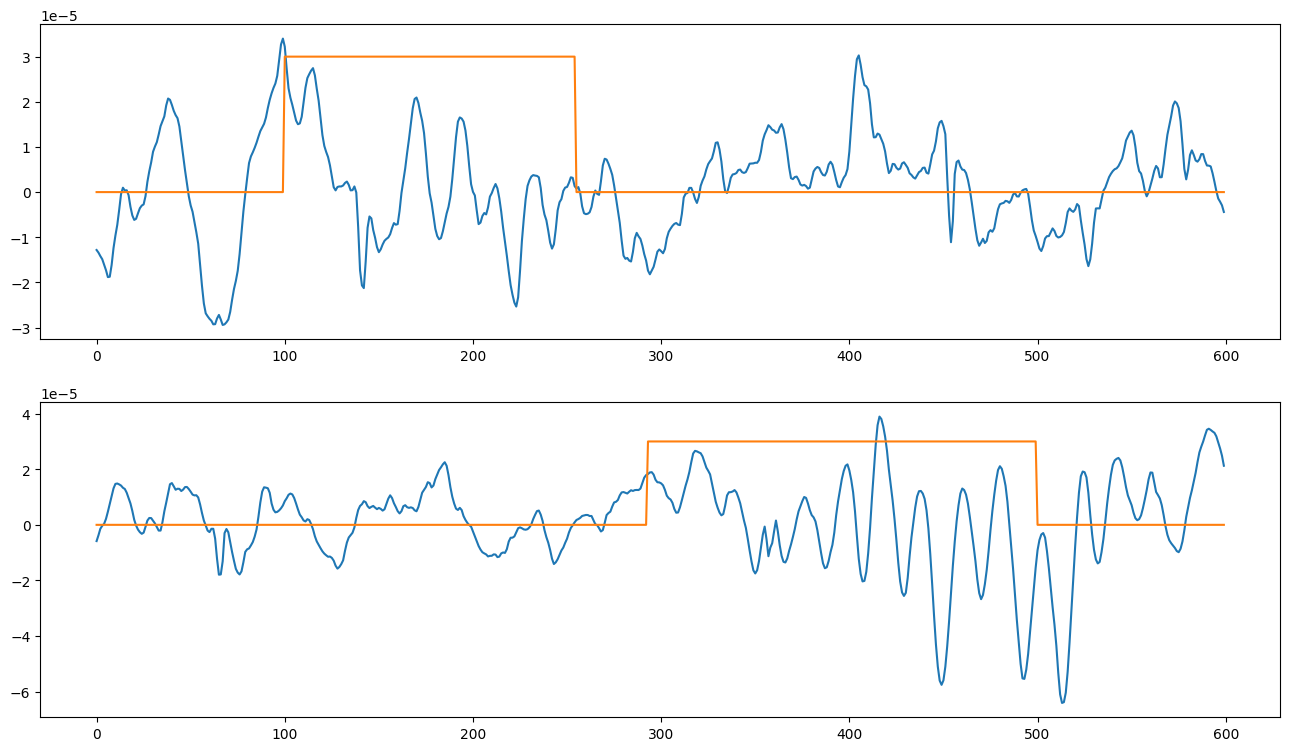

13 01-02-0014 PSG.edf
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0014 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0014 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


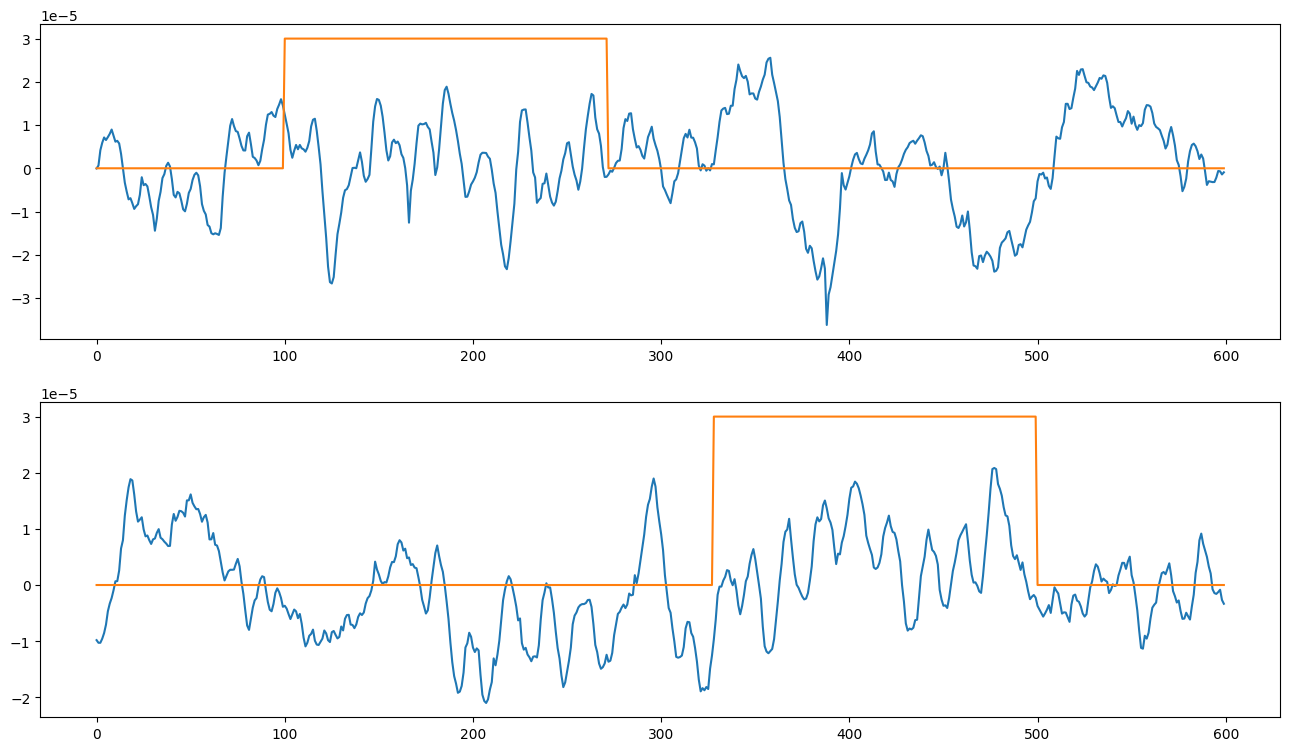

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0014 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


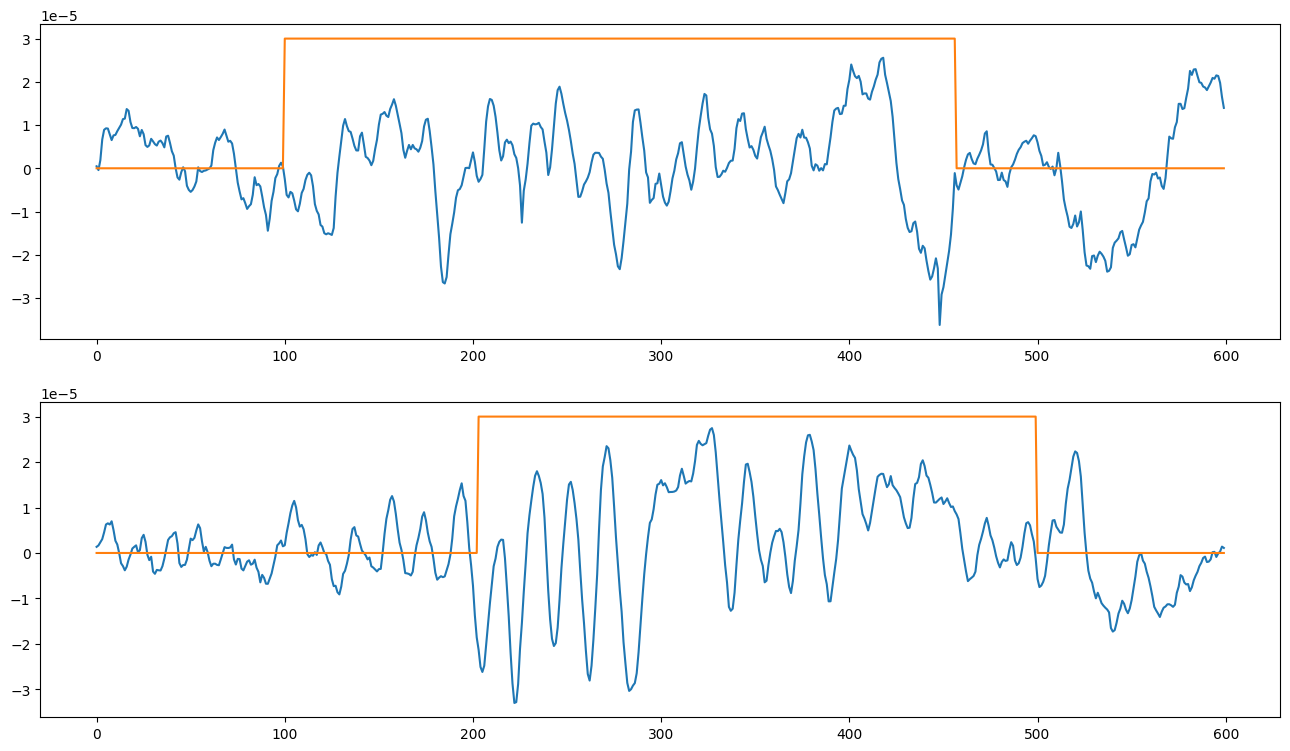

6 01-02-0007 PSG.edf
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0007 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0007 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


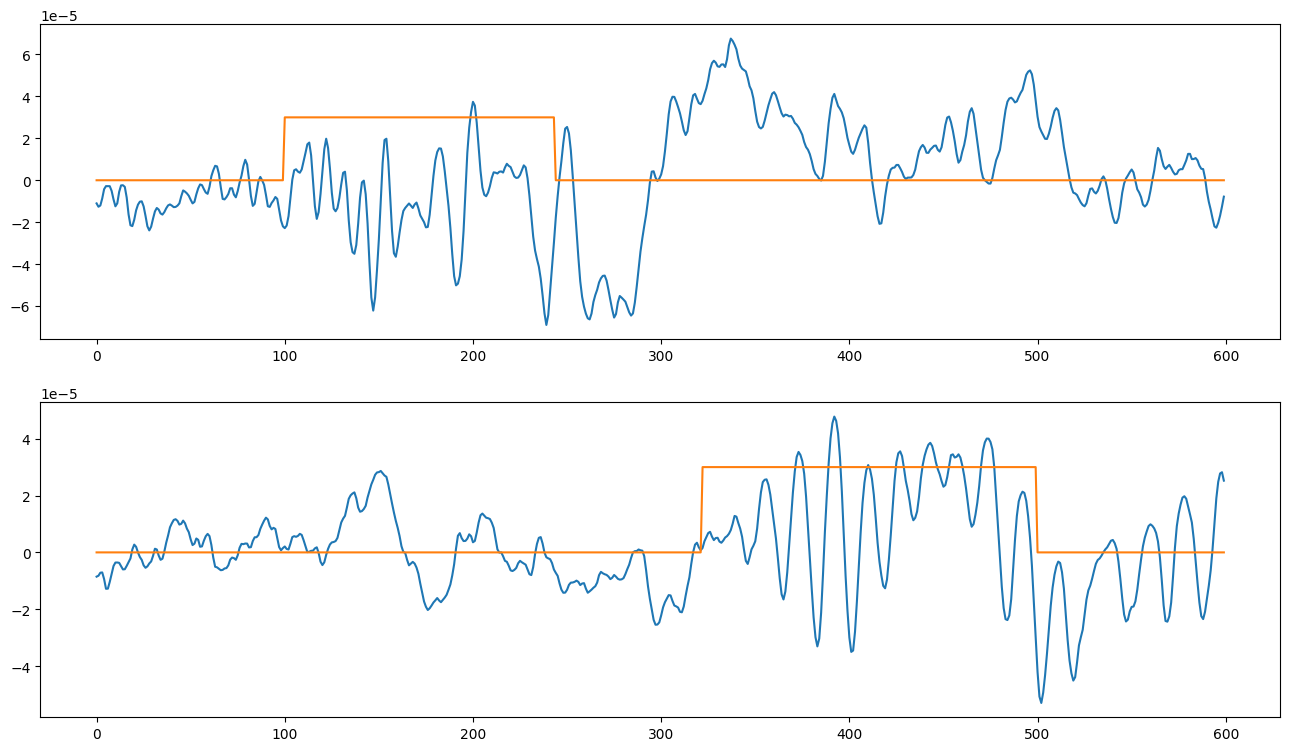

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0007 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


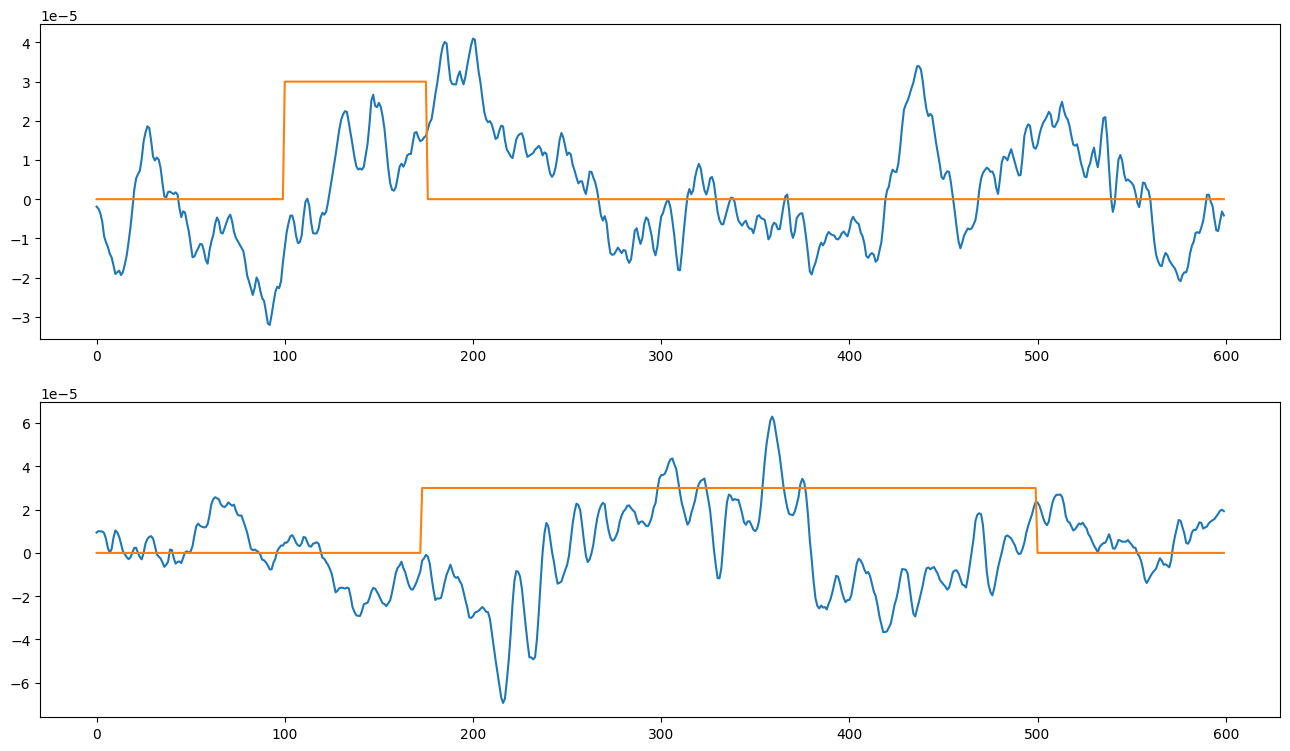

10 01-02-0011 PSG.edf
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0011 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0011 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


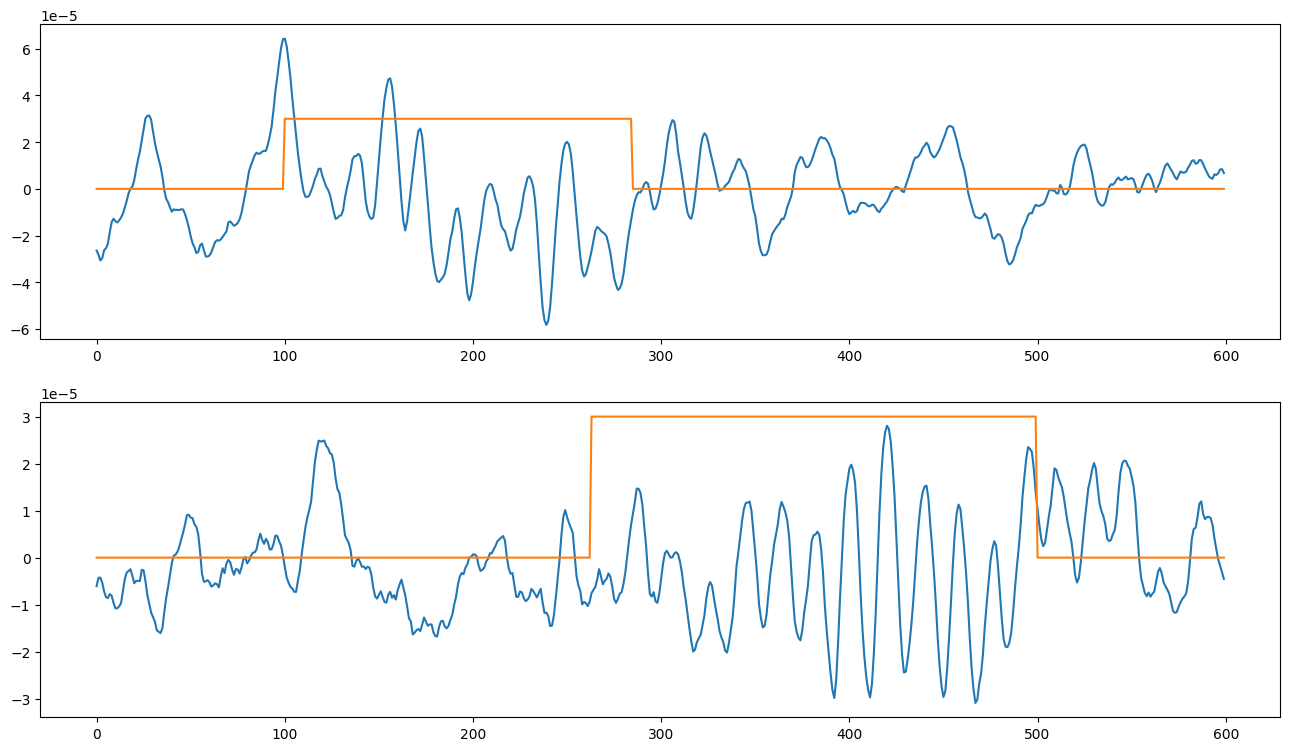

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0011 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


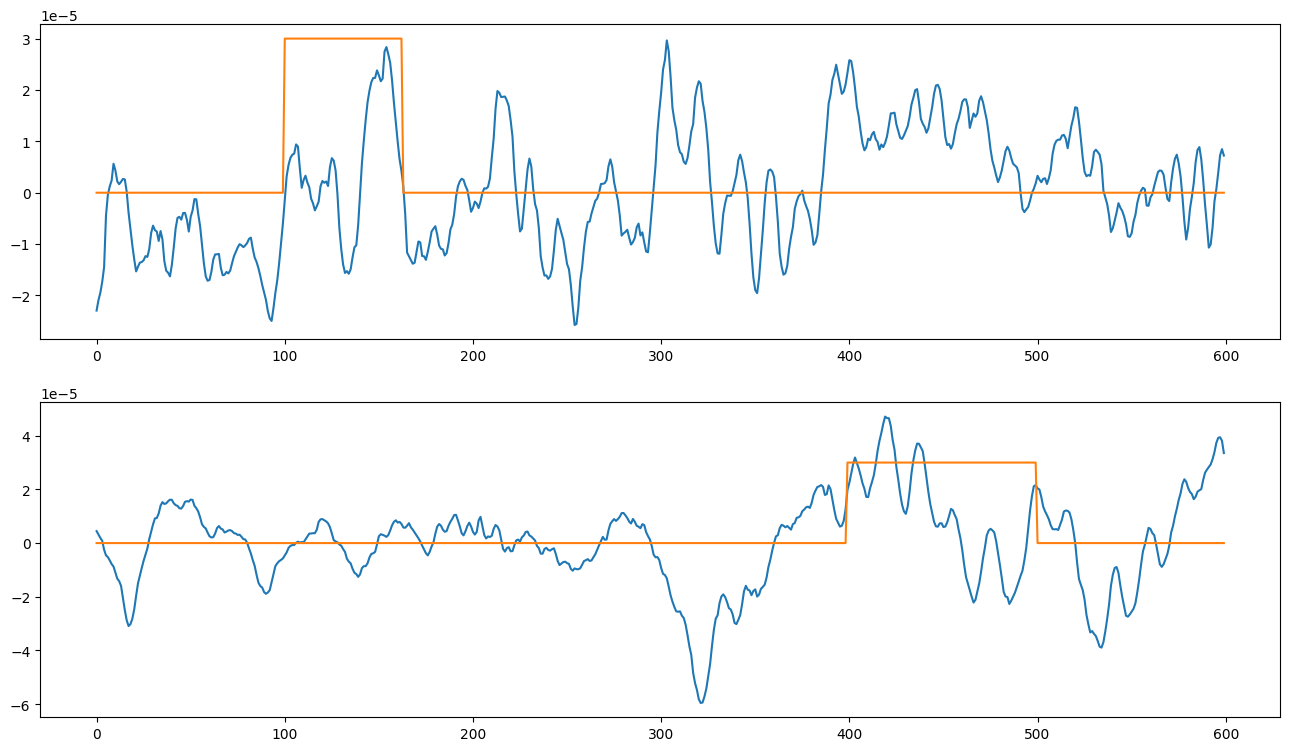

0 01-02-0001 PSG.edf
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0001 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0001 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


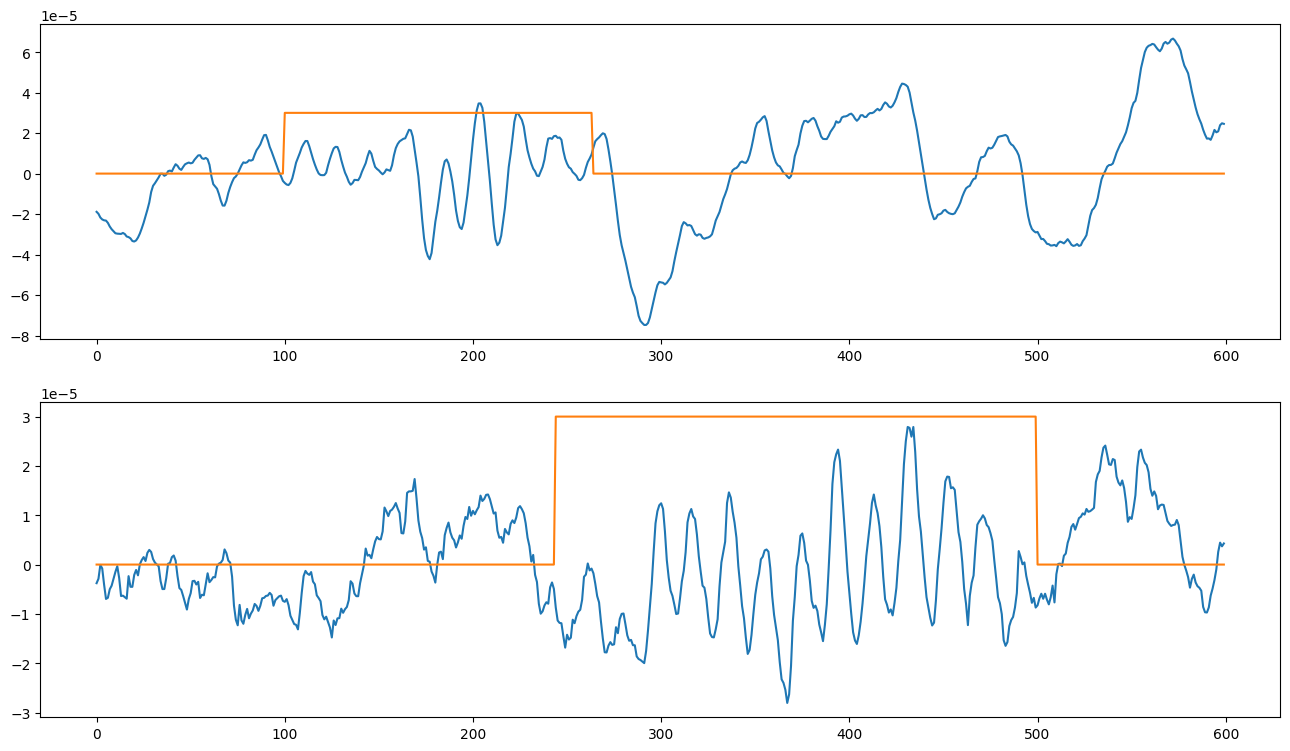

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0001 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


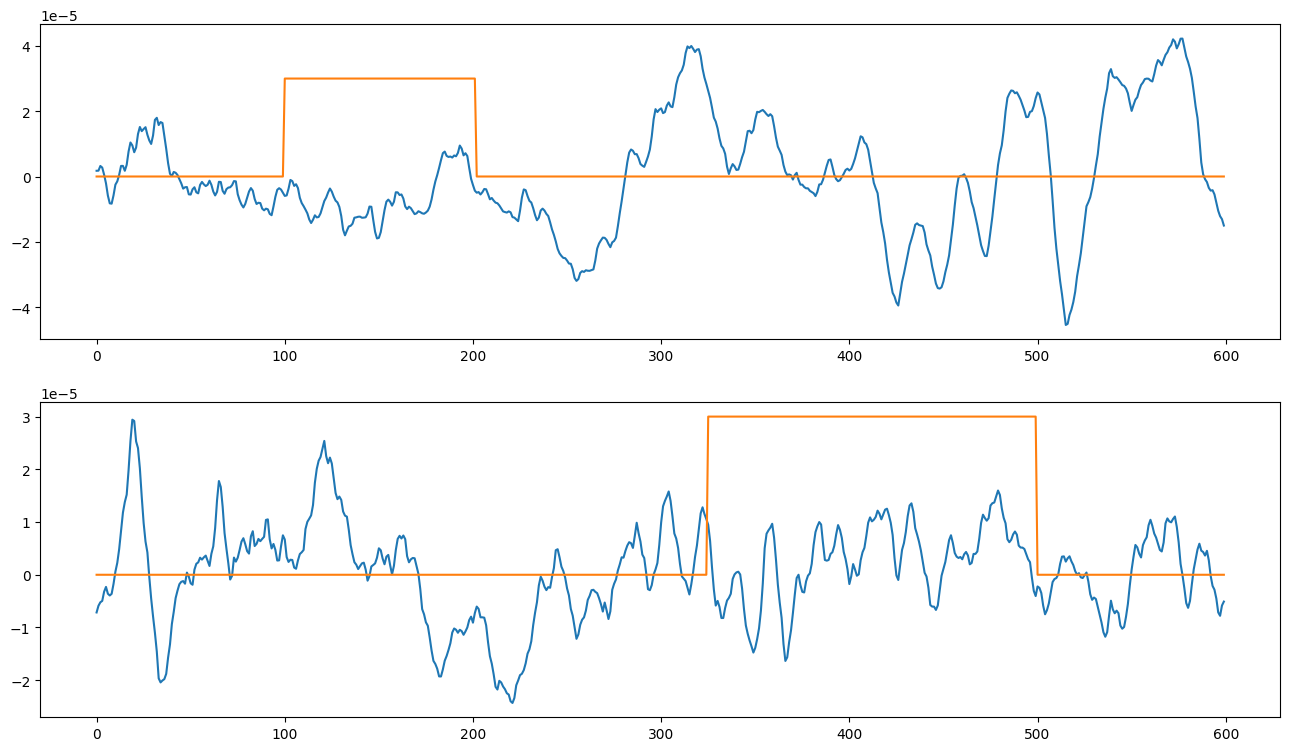

2 01-02-0003 PSG.edf
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0003 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0003 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


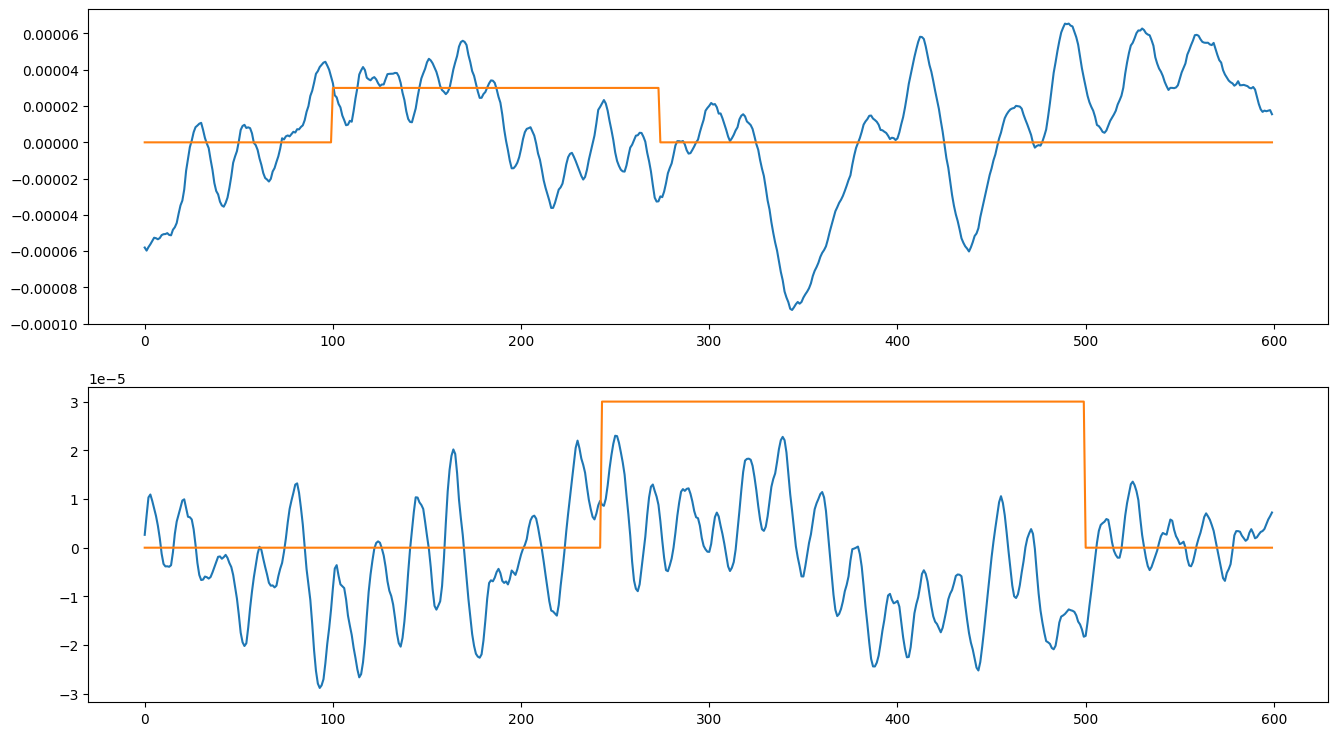

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0003 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


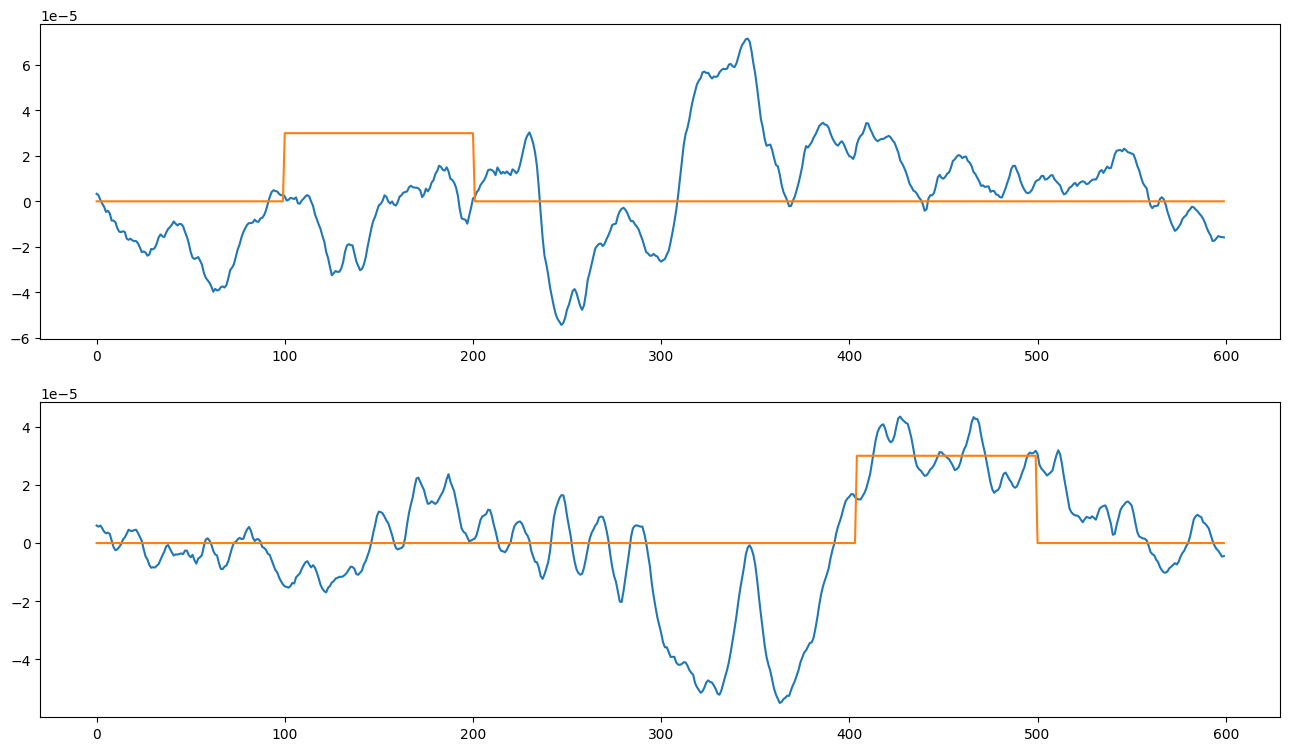

4 01-02-0005 PSG.edf
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0005 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0005 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


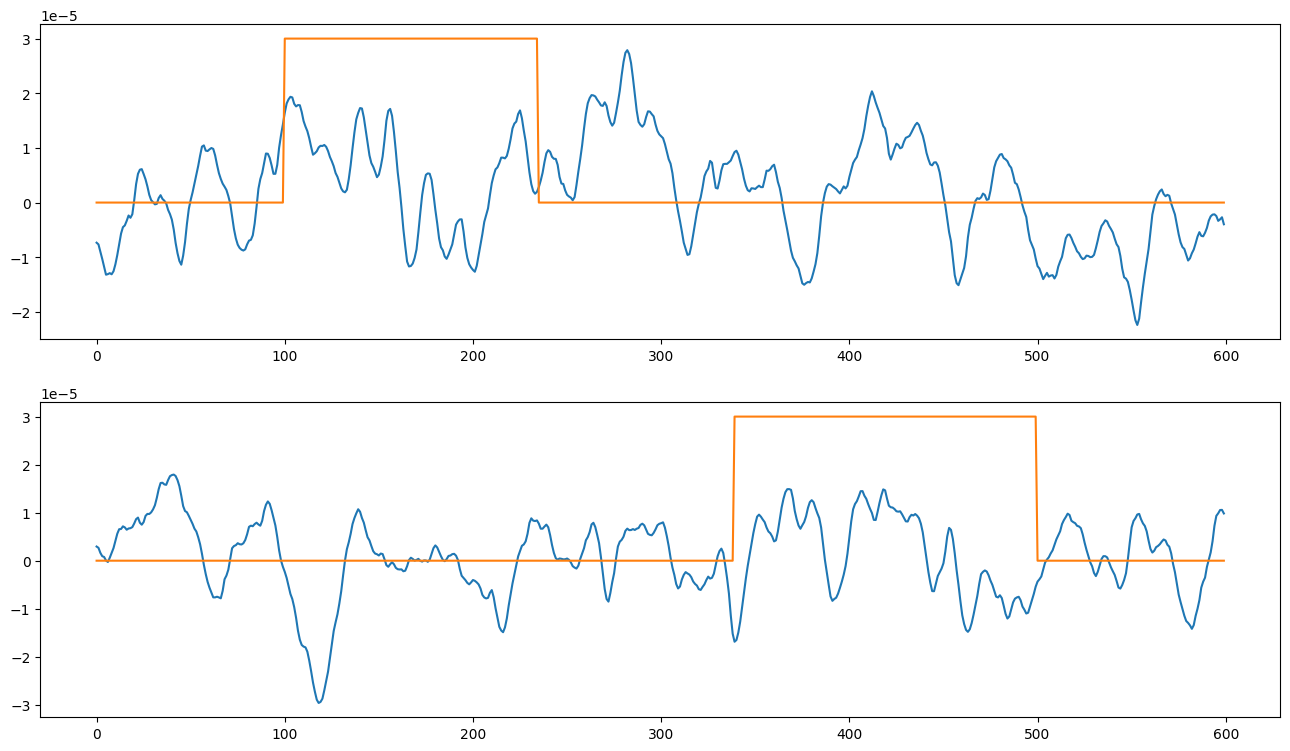

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0005 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


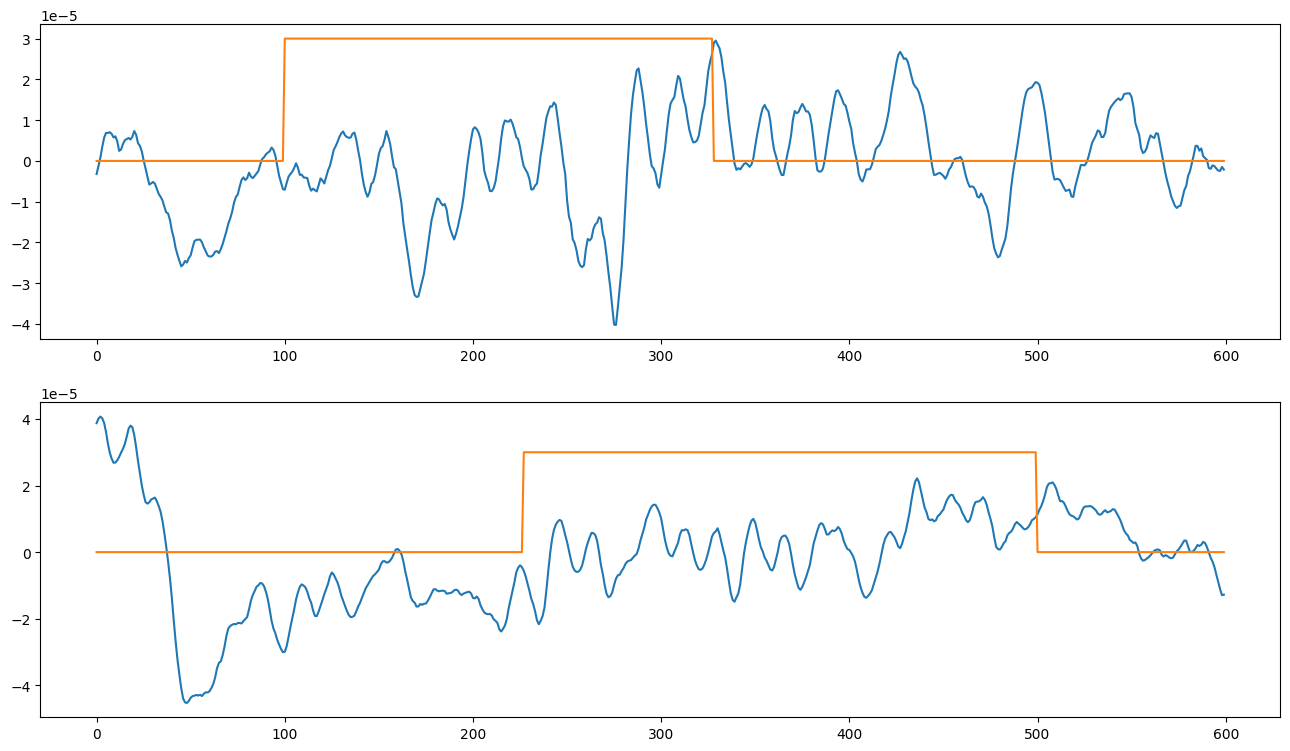

15 01-02-0016 PSG.edf
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0016 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0016 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


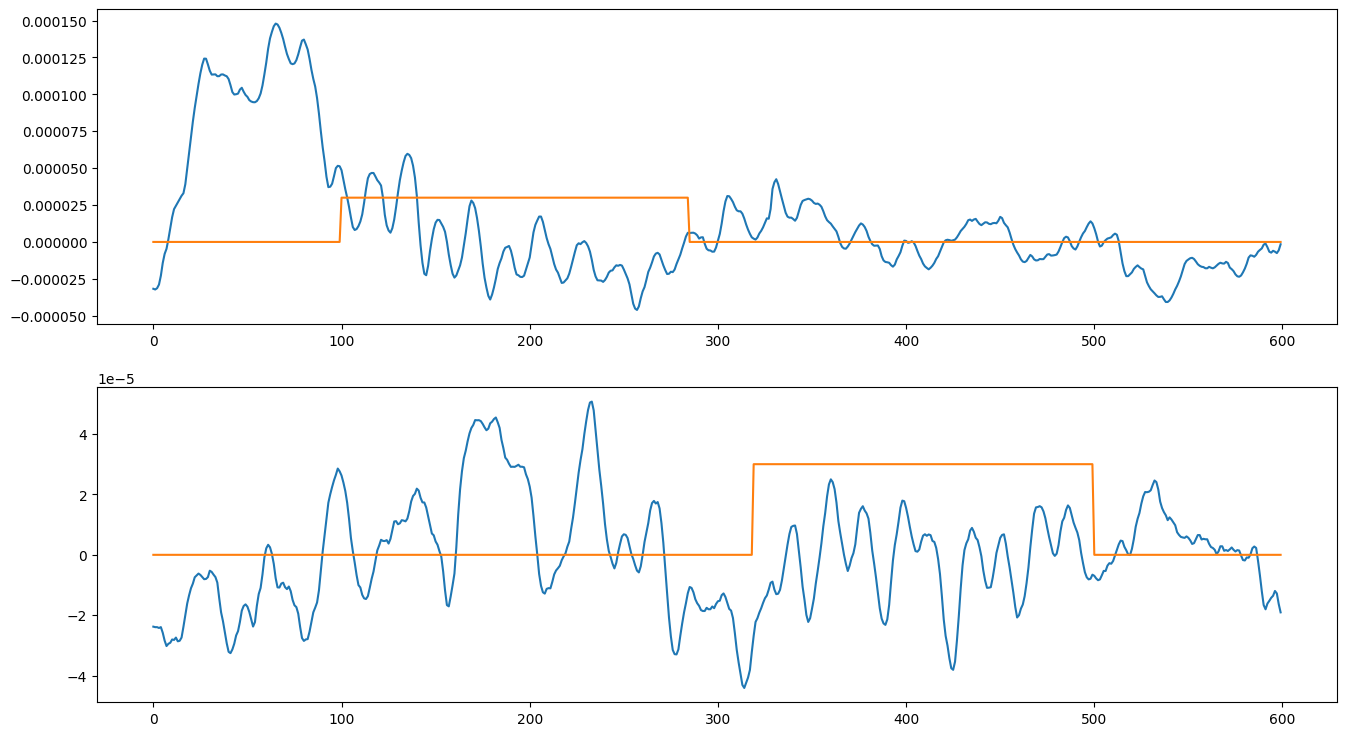

[32.002048131080386, 60.00384024577573, 60.00384024577573, 60.00384024577573, 60.00384024577573, 60.00384024577573, 59.5038082437276, 32.002048131080386, 32.002048131080386, 60.00384024577573, 60.00384024577573, 32.002048131080386, 60.00384024577573, 60.00384024577573, 58.50374423963133, 60.00384024577573, 32.002048131080386, 32.002048131080386, 60.00384024577573]


In [301]:
LabelingAllData(shifts)

In [13]:
def CreateAnnotation(labels, freq):  # можно связать с прошлой анотацией, попробовать p concatenate
    freq = 1/freq
    i = 0
    label_starts = []
    label_lens = []
    desc = []
    while i < len(labels):
        if labels[i] == 1:
            desc.append("SS")
            label_starts.append(i*freq)
            cur_start = i
            while labels[i] == 1:
                i += 1
            label_lens.append((i - cur_start) * freq)
        i += 1
    label_starts += []
    label_lens += []
    desc += []

    return np.array(label_starts), np.array(label_lens), np.array(desc)

In [305]:
def SavingDataAndLabels(shifts):
    data_filenames = []
    for file in os.listdir(PATH):
        if "PSG" in file:
            data_filenames.append(file)
    for file in tqdm(data_filenames):
        i = int(file[8:10]) - 1
        annot_filenameE1 = file[:10] + " Spindles_E1.edf"
        annot_filenameE2 = file[:10] + " Spindles_E2.edf"

        data = mne.io.read_raw_edf(PATH + file)

        labels1 = 0
        labels2 = 0
        
        if annot_filenameE1 in os.listdir(PATH):
            annot_data =  mne.io.read_raw_edf(PATH + annot_filenameE1)
            labels1 = Labeling(data.times, annot_data.annotations, shifts[i][0])
            annot_data.close()
        
        if annot_filenameE2 in os.listdir(PATH):
            annot_data =  mne.io.read_raw_edf(PATH + annot_filenameE2)
            labels2 = Labeling(data.times, annot_data.annotations, shifts[i][1])
            annot_data.close()

        labels = np.clip(labels1 + labels2, a_min=0, a_max=1)
        freq = data.info["sfreq"]
        labs_annotations = CreateAnnotation(labels, freq)
        annotations = mne.Annotations(labs_annotations[0], labs_annotations[1], labs_annotations[2])
        data.set_annotations(annotations)
        data.export("data/" + file + "WithLabels.edf", overwrite=True)
        data.close()
            
        

In [306]:
SavingDataAndLabels(shifts)

  0%|                                                             | 0/19 [00:00<?, ?it/s]

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0004 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0004 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Overwriting existing file.
Reading 0 ... 7169023  =      0.000 ... 28003.996 secs...


  5%|██▊                                                  | 1/19 [00:14<04:28, 14.91s/it]

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0010 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0010 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0010 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Overwriting existing file.
Reading 0 ... 6638079  =      0.000 ... 25929.996 secs...


 11%|█████▌                                               | 2/19 [00:57<08:51, 31.26s/it]

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0013 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0013 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0013 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Overwriting existing file.
Reading 0 ... 9311231  =      0.000 ... 36371.996 secs...


 16%|████████▎                                            | 3/19 [01:48<10:43, 40.20s/it]

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0009 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0009 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0009 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Overwriting existing file.
Reading 0 ... 7637503  =      0.000 ... 29833.996 secs...


 21%|███████████▏                                         | 4/19 [02:36<10:50, 43.38s/it]

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0012 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0012 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0012 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Overwriting existing file.
Reading 0 ... 8071679  =      0.000 ... 31529.996 secs...


 26%|█████████████▉                                       | 5/19 [03:17<09:53, 42.42s/it]

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0008 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0008 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Overwriting existing file.
Reading 0 ... 6872575  =      0.000 ... 26845.996 secs...


 32%|████████████████▋                                    | 6/19 [03:32<07:10, 33.11s/it]

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0002 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0002 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0002 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Overwriting existing file.
Reading 0 ... 8964095  =      0.000 ... 35015.996 secs...


 37%|███████████████████▌                                 | 7/19 [04:42<09:02, 45.18s/it]

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0006 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0006 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0006 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Overwriting existing file.
Reading 0 ... 7421439  =      0.000 ... 28989.996 secs...


 42%|██████████████████████▎                              | 8/19 [05:06<07:03, 38.49s/it]

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0019 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0019 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0019 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6756351  =      0.000 ... 26391.996 secs...


 47%|█████████████████████████                            | 9/19 [05:33<05:49, 34.92s/it]

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0018 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0018 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0018 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7565823  =      0.000 ... 29553.996 secs...


 53%|███████████████████████████▎                        | 10/19 [06:24<05:59, 39.95s/it]

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0017 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0017 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0017 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Overwriting existing file.
Reading 0 ... 7255551  =      0.000 ... 28341.996 secs...


 58%|██████████████████████████████                      | 11/19 [06:56<04:59, 37.49s/it]

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0015 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0015 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Overwriting existing file.
Reading 0 ... 7453183  =      0.000 ... 29113.996 secs...


 63%|████████████████████████████████▊                   | 12/19 [07:10<03:32, 30.31s/it]

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0014 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0014 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0014 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Overwriting existing file.
Reading 0 ... 7213055  =      0.000 ... 28175.996 secs...


 68%|███████████████████████████████████▌                | 13/19 [07:51<03:20, 33.42s/it]

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0007 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0007 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0007 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Overwriting existing file.
Reading 0 ... 7245311  =      0.000 ... 28301.996 secs...


 74%|██████████████████████████████████████▎             | 14/19 [08:32<02:59, 35.92s/it]

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0011 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0011 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0011 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Overwriting existing file.
Reading 0 ... 6511103  =      0.000 ... 25433.996 secs...


 79%|█████████████████████████████████████████           | 15/19 [09:06<02:20, 35.08s/it]

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0001 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0001 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0001 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Overwriting existing file.
Reading 0 ... 7412735  =      0.000 ... 28955.996 secs...


 84%|███████████████████████████████████████████▊        | 16/19 [10:02<02:04, 41.37s/it]

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0003 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0003 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0003 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Overwriting existing file.
Reading 0 ... 9410559  =      0.000 ... 36759.996 secs...


 89%|██████████████████████████████████████████████▌     | 17/19 [10:30<01:15, 37.58s/it]

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0005 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0005 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0005 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Overwriting existing file.
Reading 0 ... 7998463  =      0.000 ... 31243.996 secs...


 95%|█████████████████████████████████████████████████▎  | 18/19 [11:04<00:36, 36.49s/it]

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0016 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0016 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Overwriting existing file.
Reading 0 ... 7255039  =      0.000 ... 28339.996 secs...


100%|████████████████████████████████████████████████████| 19/19 [11:20<00:00, 35.84s/it]


### Обработка 9 записи

01-02-0009 PSG.edf
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0009 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0009 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


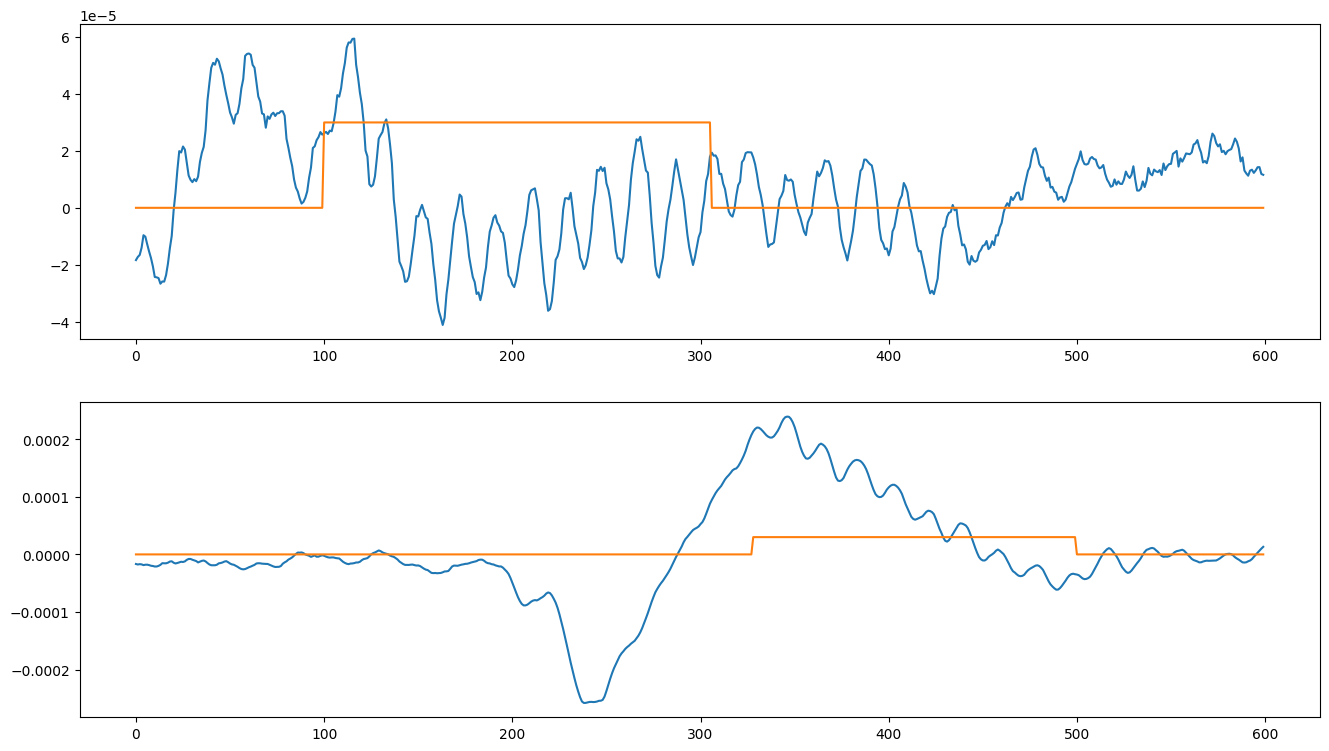

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0009 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
1670


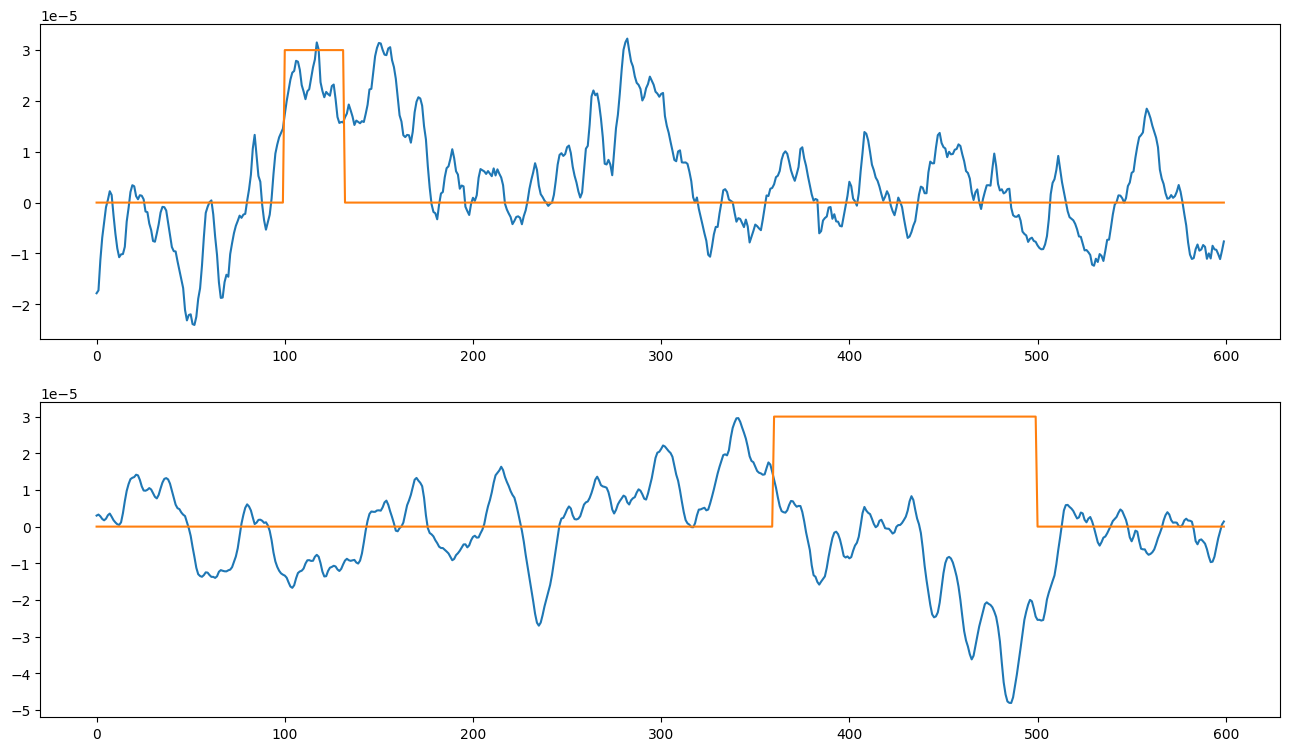

Overwriting existing file.
Reading 0 ... 7637503  =      0.000 ... 29833.996 secs...


In [15]:
data_filenames = []
freqs = []
for file in os.listdir(PATH):
    if "PSG" in file:
        data_filenames.append(file)
for file in data_filenames:
    i = int(file[8:10]) - 1
    #print(i, file)
    if "09" in file:
        print(file)
        annot_filenameE1 = file[:10] + " Spindles_E1.edf"
        annot_filenameE2 = file[:10] + " Spindles_E2.edf"
        data = mne.io.read_raw_edf(PATH + file)
    
        labels1 = 0
        labels2 = 0
        
        if annot_filenameE1 in os.listdir(PATH):
            annot_data =  mne.io.read_raw_edf(PATH + annot_filenameE1)
            labels1 = Labeling(data.times, annot_data.annotations, shifts[i][0])
            Plotting(labels1, data)
            freqs.append(annot_data.info["sfreq"])
            annot_data.close()
        
        if annot_filenameE2 in os.listdir(PATH):
            annot_data =  mne.io.read_raw_edf(PATH + annot_filenameE2)
            print(len(annot_data.annotations))
            labels2 = Labeling(data.times, annot_data.annotations[:-1], shifts[i][1])
            Plotting(labels2, data)
            annot_data.close()
    
        labels = np.clip(labels1 + labels2, a_min=0, a_max=1)
        np.save("data/" + file + "labels", labels)
        freq = data.info["sfreq"]
        labs_annotations = CreateAnnotation(labels, freq)
        annotations = mne.Annotations(labs_annotations[0], labs_annotations[1], labs_annotations[2])
        data.set_annotations(annotations)
        data.export("data/" + file + "WithLabels.edf", overwrite=True)
        data.close()
        

### DRAFTS

In [5]:
shifts = []

In [286]:
data = mne.io.read_raw_edf("../../../MASS/ss2/01-02-0019 PSG.edf")
raw_data = data.get_data()
# you can get the metadata included in the file and a list of all channels:
info = data.info
channels = data.ch_names

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0019 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [290]:
annot_data =  mne.io.read_raw_edf("../../../MASS/ss2/01-02-0019 Spindles_E2.edf")
# you can get the metadata included in the file and a list of all channels:
annot_info = annot_data.info
annot_channels = annot_data.ch_names

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0019 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [291]:
labels = Labeling(data.times, annot_data.annotations, 230)

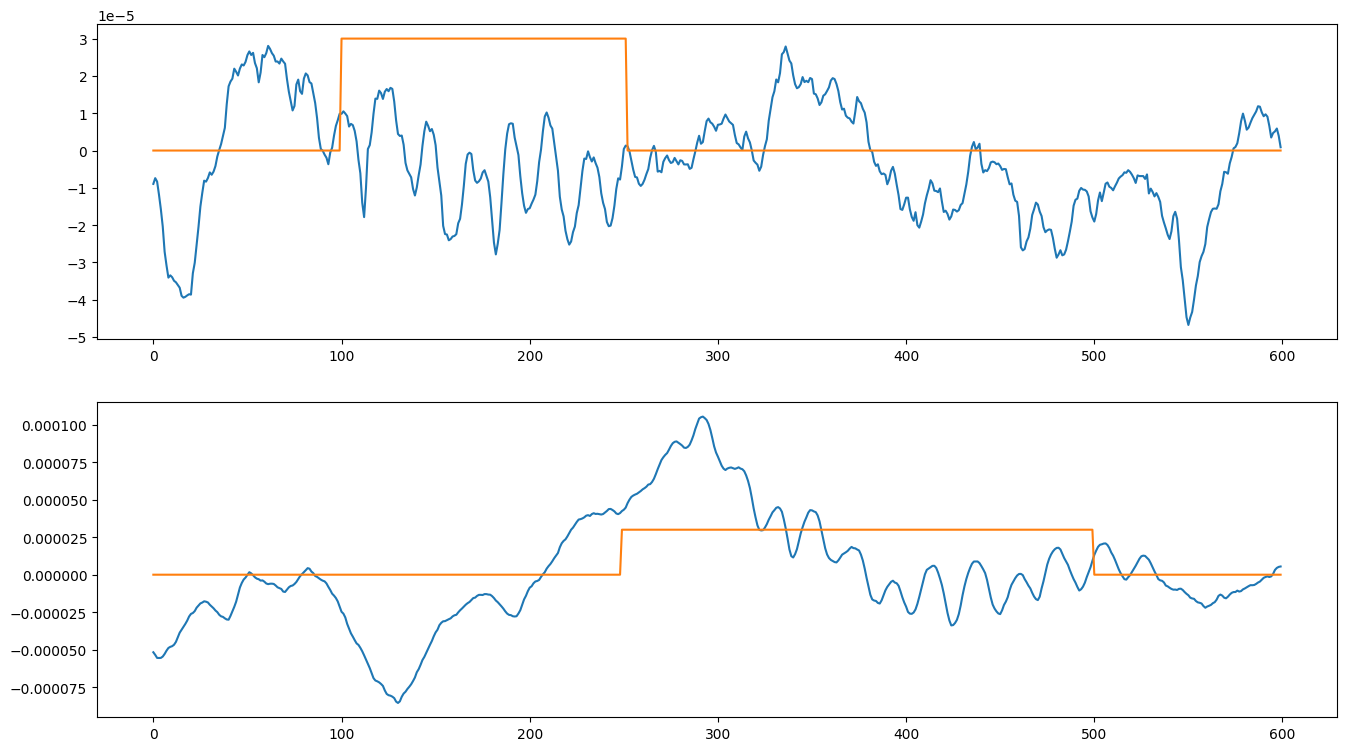

In [292]:
Plotting(labels, data)

In [293]:
shifts.append([230])

In [294]:
shifts[-1].append(230)

In [295]:
shifts

[[57, 57],
 [10, 10],
 [170, 170],
 [200, None],
 [220, 220],
 [20, 20],
 [245, 245],
 [230, None],
 [195, 195],
 [192, 192],
 [14, 14],
 [195, 195],
 [240, 240],
 [155, 155],
 [178, None],
 [95, None],
 [230, 230],
 [230, 230],
 [230, 230]]

In [296]:
len(shifts)

19

In [7]:
annot_info["sfreq"]

60.00384024577573

In [8]:
info["sfreq"]


256.0

In [32]:
#new_annot_time = np.linspace(annot_data.times[0], annot_data.times[-1], int(info["sfreq"] / annot_info["sfreq"] * len(annot_data.times)))

In [33]:
new_annot_time

array([0.00000000e+00, 3.90624857e-03, 7.81249714e-03, ...,
       2.89561222e+04, 2.89561261e+04, 2.89561300e+04])

In [16]:
annot_data.times

array([0.00000000e+00, 1.66656000e-02, 3.33312000e-02, ...,
       2.89560967e+04, 2.89561134e+04, 2.89561300e+04])

In [32]:
data.times

array([0.00000000e+00, 3.90625000e-03, 7.81250000e-03, ...,
       2.89559883e+04, 2.89559922e+04, 2.89559961e+04])

In [15]:
annot_data.annotations[0]

OrderedDict([('onset', 888.569501),
             ('duration', 0.640579),
             ('description',
              '<Event channel="EEG C3-LER" groupName="spindle" name="spindleE1" scoringType="manual"/>'),
             ('orig_time',
              datetime.datetime(2000, 1, 1, 23, 0, 59, tzinfo=datetime.timezone.utc))])

In [38]:
14 * 60

840

In [11]:
data.times.shape

(7412736,)

In [12]:
labels.shape

(7412736,)

In [13]:
start = np.array(data.times < 888.569501).argmin()
fin = np.array(data.times < 888.569501 + 0.640579).argmin()

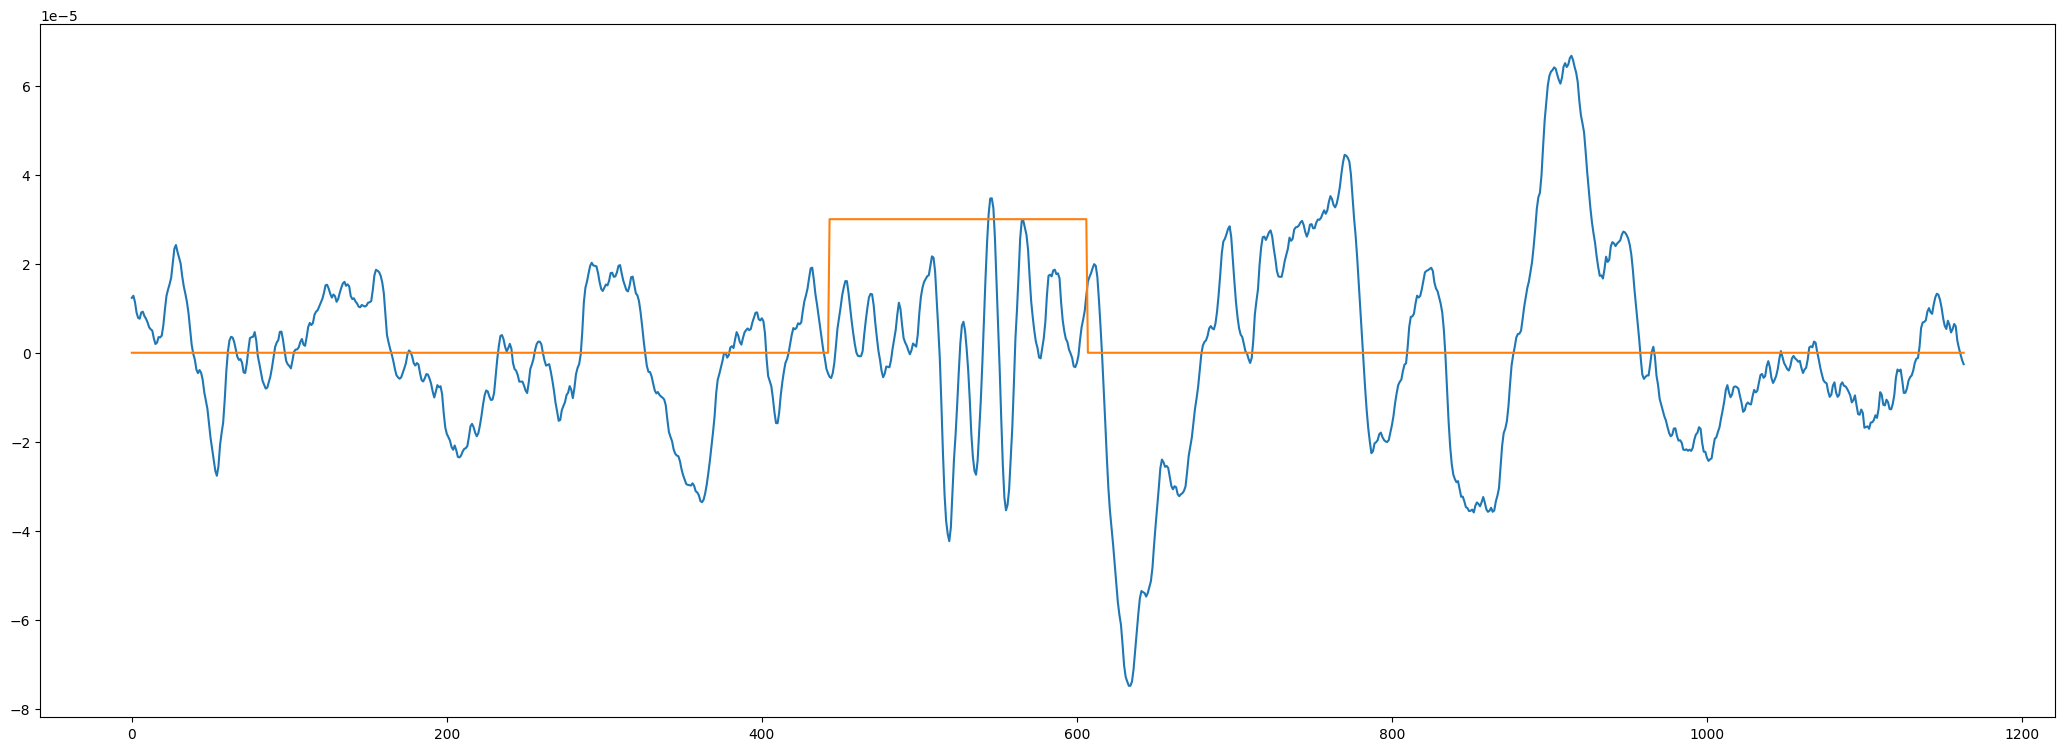

In [43]:
plt.figure(figsize=(26, 9))
plt.plot(raw_data[3, start - 500: fin + 500])
check = np.zeros(fin - start + 1000)
check[500 - 57:-500 - 57] = 1
plt.plot(check  * 3e-5)

#plt.plot(labels[start - 500: fin + 500] * 3e-5)


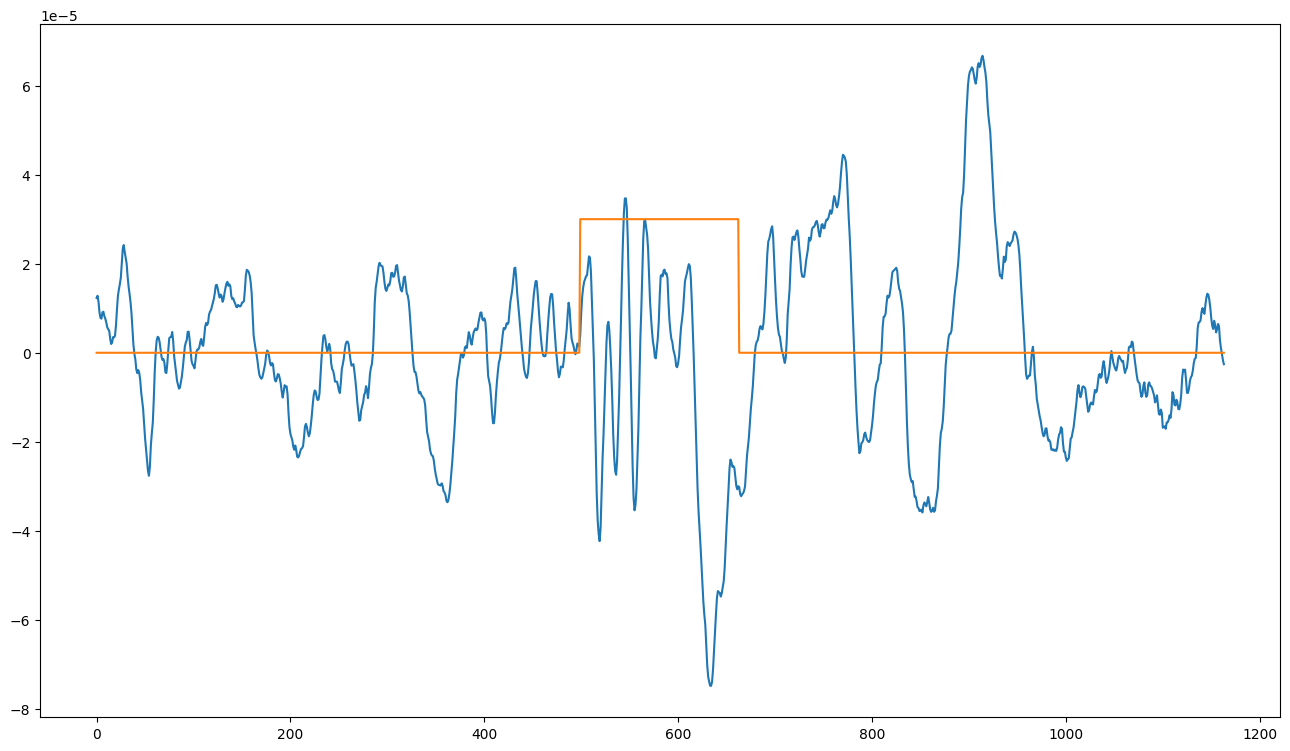

In [36]:
plt.figure(figsize=(16, 9))
plt.plot(raw_data[3, start - 500: fin + 500])
plt.plot(labels[start - 500: fin + 500] * 3e-5)


In [47]:
ind = labels[-100000:].argmax() + 7412736-100000

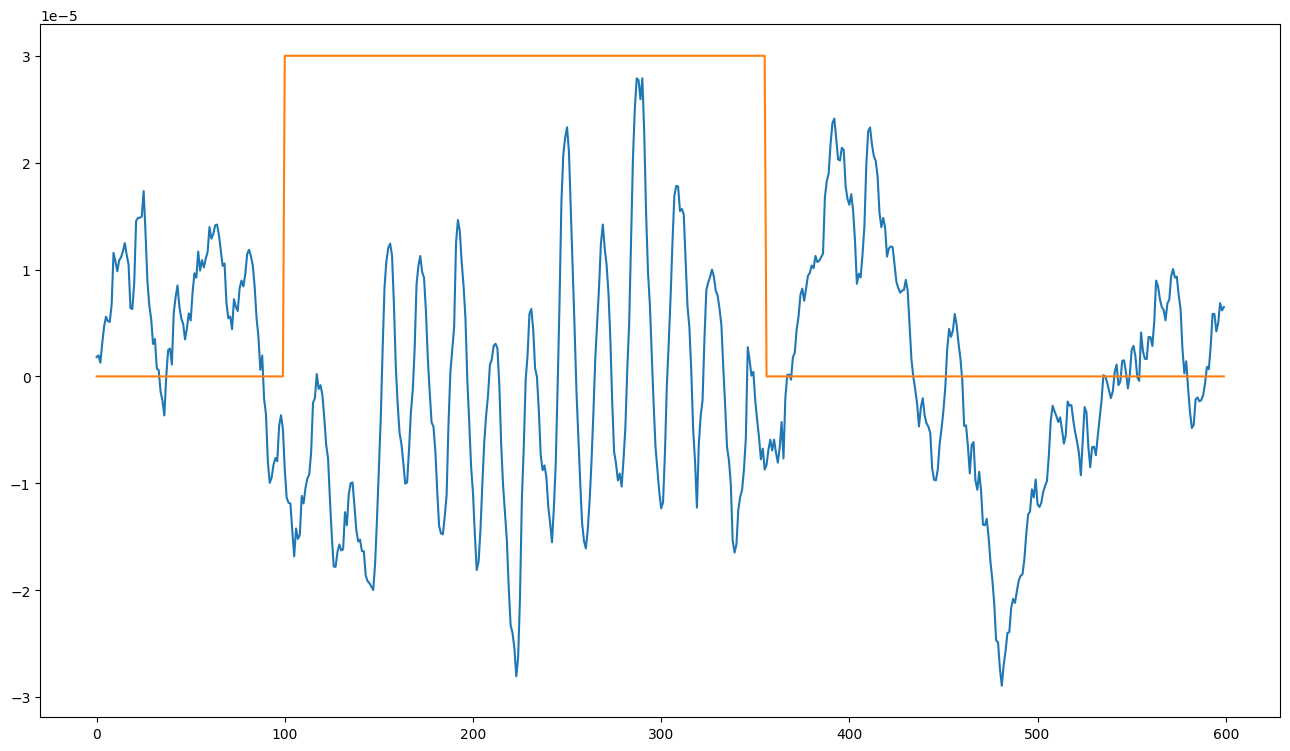

In [48]:
plt.figure(figsize=(16, 9))
plt.plot(raw_data[3, ind - 100: ind + 500])
plt.plot(labels[ind - 100: ind + 500] * 3e-5)


In [49]:
annot_data =  mne.io.read_raw_edf("../../../MASS/ss2/01-02-0001 Spindles_E2.edf")
# you can get the metadata included in the file and a list of all channels:
annot_info = annot_data.info
annot_channels = annot_data.ch_names

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0001 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [53]:
annot_info["sfreq"]

49.503168202764975

In [50]:
labels = Labeling(data.times, annot_data.annotations)

In [51]:
start = np.array(data.times < 888.569501).argmin()
fin = np.array(data.times < 888.569501 + 0.640579).argmin()

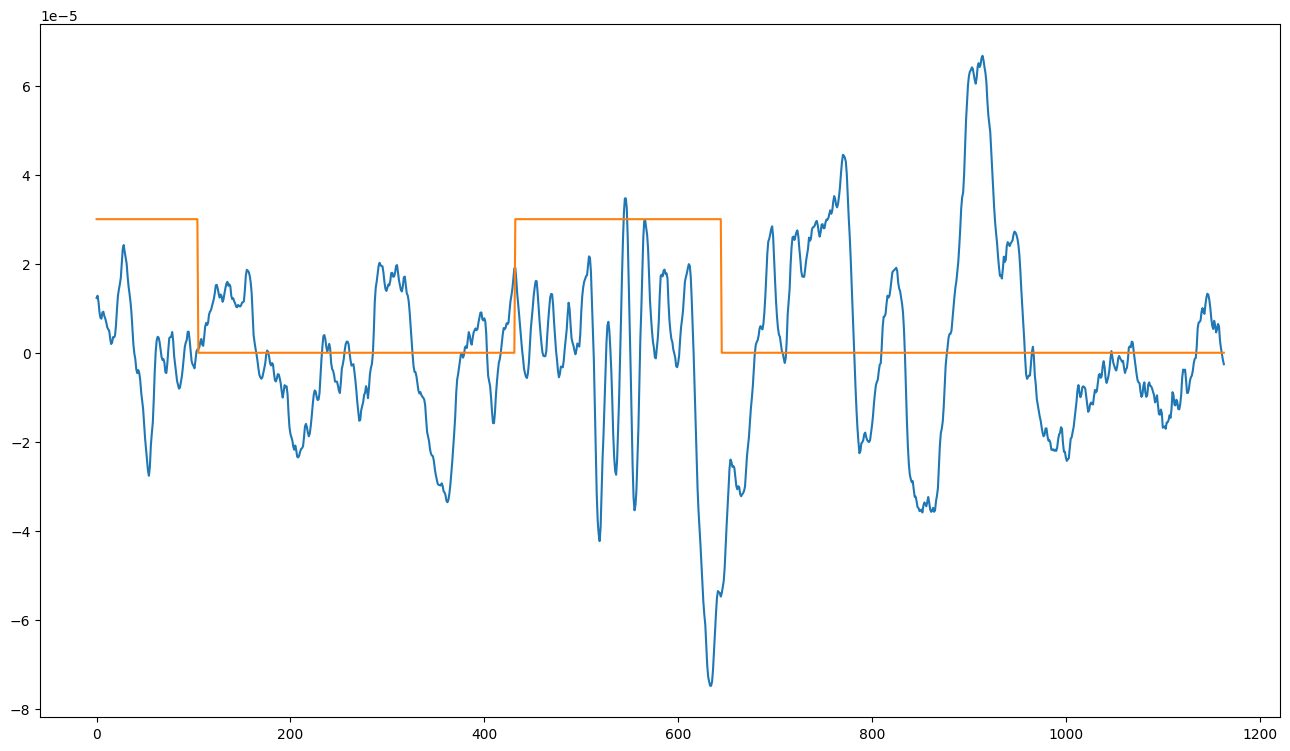

In [52]:
plt.figure(figsize=(16, 9))
plt.plot(raw_data[3, start - 500: fin + 500])
plt.plot(labels[start - 500: fin + 500] * 3e-5)


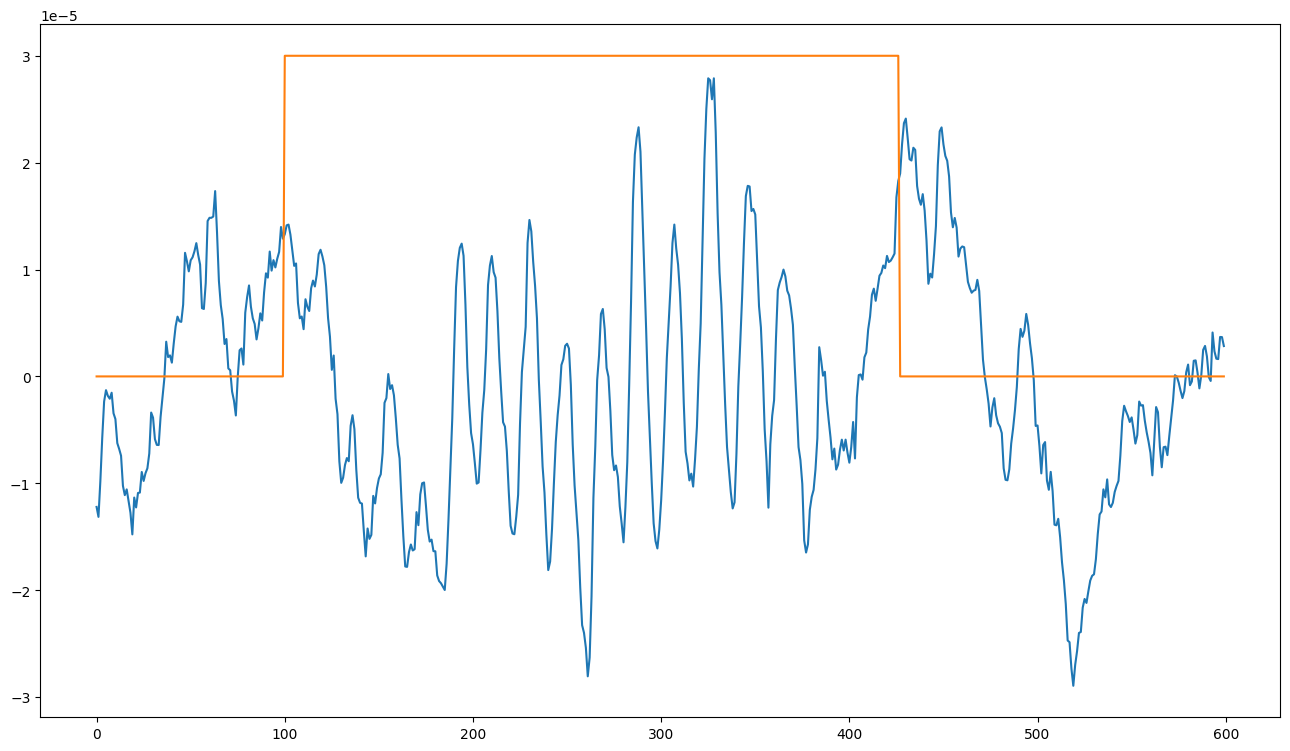

In [54]:
ind = labels[-100000:].argmax() + 7412736-100000
plt.figure(figsize=(16, 9))
plt.plot(raw_data[3, ind - 100: ind + 500])
plt.plot(labels[ind - 100: ind + 500] * 3e-5)
